In [1]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits
from memory_profiler import memory_usage
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [2]:
sig_file = data_file =  "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/MC3b_tree/sig_root/100k_cdc_merged.root"

In [38]:
file_base = "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/test_signal_sample/100k_"
sig_file = file_base + "cdc_sum_hits.root"
#cth_sig_file = file_base + "cth_mc_hits.root"

In [4]:
from root_numpy import root2array


ice_sample = root2array(sig_file, treename="COMETEventsSummary")

KeyboardInterrupt: 

In [ ]:
for name in ice_sample.dtype.names:
    print name

In [ ]:
figsize(10,4.5)

for name in ice_sample.dtype.names:
    plt.title(name)
    plt.hist(ice_sample[name], bins=100)
    show()

In [ ]:
plt.hist(ice_sample["CDCHit.fHitNumber"], bins=600)
show()

In [ ]:
print ice_sample["CDCHit.fEventNumber"]

In [ ]:
print np.sort(np.array(Counter(ice_sample["CDCHit.fEventNumber"]).items())[:,1])

In [ ]:
del ice_sample

In [39]:
import hits

In [40]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [41]:
from hits import FlatHits

In [42]:
def init_flat_hits(data_file):
    return FlatHits(path=data_file, 
                    prefix="CDCHit.f", 
                    key_name="EventNumber",
                    hit_type_name="TurnID",
                    branches=["Charge", 
                              "Channel", 
                              "HitNumber", 
                              "MCPos.fE", 
                              "DriftDist",
                              "CDCHit.fTrack.fTags.fTagMaskPersisted",
                              "CDCHit.fTrack.fTrackID",
                              "CDCHit.fTrack.fPID",
                              "CDCHit.fTrack.fStartMomentum.fX",
                              "CDCHit.fTrack.fStartMomentum.fY",
                              "CDCHit.fTrack.fStartMomentum.fZ"],
                    use_evt_idx=True)

In [43]:
ice_sig = init_flat_hits(sig_file)

CDCHit.fCharge
CDCHit.fChannel
CDCHit.fHitNumber
CDCHit.fMCPos.fE
CDCHit.fDriftDist
CDCHit.fTrack.fTags.fTagMaskPersisted
CDCHit.fTrack.fTrackID
CDCHit.fTrack.fPID
CDCHit.fTrack.fStartMomentum.fX
CDCHit.fTrack.fStartMomentum.fY
CDCHit.fTrack.fStartMomentum.fZ
CDCHit.fTurnID
CDCHit.fEventNumber
CDCHit.fhits_index
CDCHit.fevent_index


In [37]:
#ice_back = init_flat_hits(bck_file)

In [11]:
ice_flat = ice_sig

In [12]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.event_to_hits

['CDCHit.fCharge', 'CDCHit.fChannel', 'CDCHit.fHitNumber', 'CDCHit.fMCPos.fE', 'CDCHit.fDriftDist', 'CDCHit.fTrack.fTags.fTagMaskPersisted', 'CDCHit.fTrack.fTrackID', 'CDCHit.fTrack.fPID', 'CDCHit.fTrack.fStartMomentum.fX', 'CDCHit.fTrack.fStartMomentum.fY', 'CDCHit.fTrack.fStartMomentum.fZ', 'CDCHit.fTurnID', 'CDCHit.fEventNumber', 'CDCHit.fhits_index', 'CDCHit.fevent_index']
52642
4583396
[457 158 136 ..., 182 252  69]
[ array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 10

In [13]:
import pandas

In [14]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df

CDCHit.fCharge  CDCHit.fChannel  CDCHit.fHitNumber  CDCHit.fMCPos.fE  \
0                    39                0                  0        612.205078   
1                    57                1                  1        612.271851   
2                    34                2                  2        612.340210   
3                    66                3                  3        612.406921   
4                    58                4                  4        612.473633   
5                     1                5                  5        612.506958   
6                    13               12                  6        613.141479   
7                    27               13                  7        613.174805   
8                    36               14                  8        613.276489   
9                    52               15                  9        613.343262   
10                   44               16                 10        613.413330   
11                    5               17                 11        613.444153   
12                   37              205                 12        612.541870   
13                   60              206                 13        612.608521   
14                   39              207                 14        612.676941   
15                   73              208                 15        612.743652   
16                   74              209                 16        612.810364   
17                   53              210                 17        612.876221   
18                   30              211                 18        612.943787   
19                  461              212                 19        613.010010   
20                   38              213                 20        613.076721   
21                    6              214                 21        613.108276   
22                   23               28                  0       1895.648804   
23                   59               29                  1       1895.682129   
24                    4               30                  2       1888.580322   
25                   28               30                  3       1895.740234   
26                   21               31                  4       1888.614502   
27                   11               32                  5       1888.649414   
28                   50              190                  6       1893.222900   
29                   25              191                  7       1886.042969   
...                 ...              ...                ...               ...   
4583366              56             1457                 36       1116.446411   
4583367              72             1458                 37       1116.513184   
4583368              39             1459                 38       1116.547363   
4583369              18             1676                 39       1115.018921   
4583370              39             1677                 40       1115.052246   
4583371              39             1678                 41       1115.118164   
4583372              25             1679                 42       1115.185791   
4583373              12             1680                 43       1115.213379   
4583374              20             1696                 44       1116.192383   
4583375              36             1697                 45       1116.225830   
4583376              47             1698                 46       1116.292480   
4583377              49             1699                 47       1116.327393   
4583378              11             1700                 48       1116.389404   
4583379              57             1920                 49       1115.241211   
4583380              73             1921                 50       1115.307861   
4583381              54             1922                 51       1115.374512   
4583382              47             1923                 52       1115.442993   
4583383              34             1924

In [15]:
del iced_df

# Visualize Data

In [16]:
figsize(12,8)
plot_set_font()

In [17]:
from cylinder import CyDet
geom = CyDet()

### Histograms

In [18]:
# Hit times relative to the earliest hit in the detector
rel_hit_times = np.concatenate(
    [ice_flat.get_events(evt)["CDCHit.fMCPos.fE"] - np.amin(ice_flat.get_events(evt)["CDCHit.fMCPos.fE"]) \
     for evt in list(np.unique(ice_flat.hits_to_events))])
print rel_hit_times.shape

(4583396,)


In [19]:
# Hit number in the event 
print ice_flat.get_events()["CDCHit.fHitNumber"].shape

(4583396,)


/home/hep/elg112/software/python/virtual_envs/rep/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


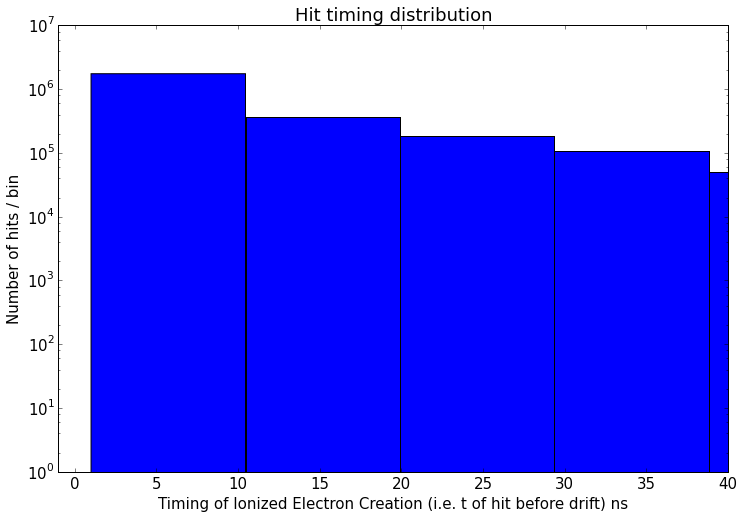

In [20]:
plt.hist(rel_hit_times + 1, bins=1000, log=True)
plt.xlim(-1,40)
plt.title("Hit timing distribution")
plt.xlabel("Timing of Ionized Electron Creation (i.e. t of hit before drift) ns")
plt.ylabel("Number of hits / bin")
plt.show()

In [21]:
def compare_raw_variable(name, **kwargs):
    compare_dists(ice_flat.get_events[name], 
                  ice_back.get_events[name],
                  **kwargs)

In [22]:
def compare_dists(dist_1, dist_2, **kwargs):
    plt.hist(dist_1, color='b', **kwargs)
    plt.hist(dist_2, color='r', **kwargs)
    plt.show()

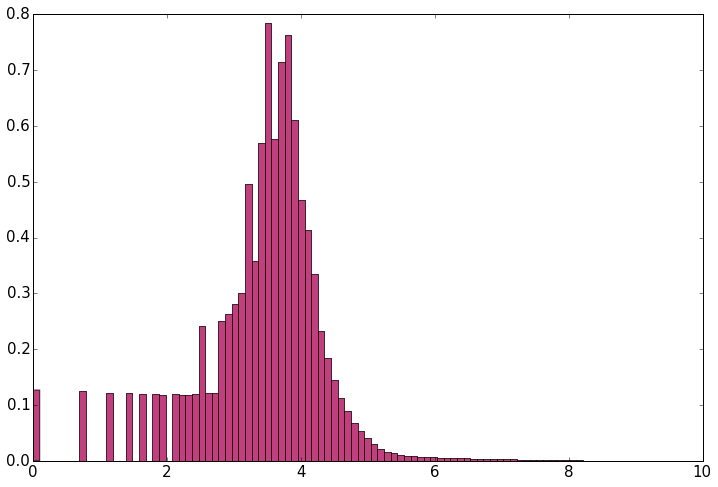

In [23]:
figsize(12,8)
compare_dists(np.log(ice_flat.get_events()["CDCHit.fCharge"]),
              np.log(ice_sig.get_events()["CDCHit.fCharge"]), 
              bins=100, 
              alpha=0.5,
              normed=1)
plt.show()

In [24]:
print np.unique(ice_flat.get_events()["CDCHit.fChannel"])

[   0    1    2 ..., 4479 4480 4481]


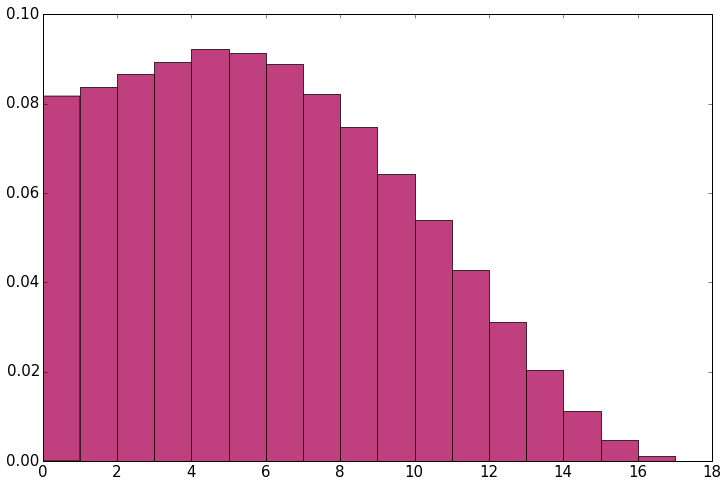

In [25]:
plt.hist(geom.point_layers[ice_flat.get_events()["CDCHit.fChannel"]], 
         bins=17, 
         normed=1, 
         alpha = 0.5)
plt.hist(geom.point_layers[ice_sig.get_events()["CDCHit.fChannel"]], 
         bins=17, 
         normed=1, 
         alpha = 0.5,
         color='r')
plt.show()

In [26]:
all_max = list()
for event in list(np.unique(ice_flat.hits_to_events)):
    all_max.append(np.amax(ice_flat.get_events(event)["CDCHit.fHitNumber"]))

In [27]:
all_max.sort()
print all_max[-100:]

[695, 695, 696, 697, 699, 702, 702, 703, 703, 707, 707, 708, 710, 710, 712, 713, 716, 717, 717, 721, 721, 722, 725, 727, 729, 730, 730, 733, 733, 735, 735, 737, 741, 742, 744, 745, 745, 747, 750, 750, 752, 753, 758, 761, 767, 773, 779, 780, 780, 783, 784, 786, 789, 794, 796, 799, 801, 802, 803, 810, 816, 821, 821, 825, 833, 833, 837, 839, 842, 843, 845, 847, 853, 854, 854, 859, 859, 864, 868, 872, 900, 905, 906, 931, 935, 940, 963, 964, 970, 974, 976, 979, 992, 1003, 1031, 1061, 1062, 1120, 1126, 1143]


### Event Display

In [44]:
all_event = numpy.zeros((ice_flat.n_events, geom.n_points))
all_times = []
index_to_event = []

In [45]:
for index, event in enumerate(list(np.unique(ice_flat.hits_to_events))[:100]):
    # Hit and turn identifiers 
    hit_wires = ice_flat.get_events(events=event)["CDCHit.fChannel"]
    turn_values = ice_flat.get_events(events=event)["CDCHit.fTurnID"] 
    all_event[index,hit_wires] = 1 + turn_values
    # Timing considerationgs
    turn_val_timing = dict()  
    hit_timing = ice_flat.get_events(events=event)["CDCHit.fMCPos.fE"]
    for hit, tval in zip(hit_timing, turn_values):
        turn_val_timing[tval] = turn_val_timing.get(tval, []) + [hit]
    all_times += [dict(turn_val_timing)]
    index_to_event.append(event)

Event 0
0 1 732.947875977 732.947875977 732.947875977
1 289 226.678710938 2599.56616211 1016.45836183
2 159 233.322906494 1895.74023438 977.799125623
3 8 239.873443604 240.258056641 240.075391769
Regestered hits 335
Missed hits 1
All hits 457


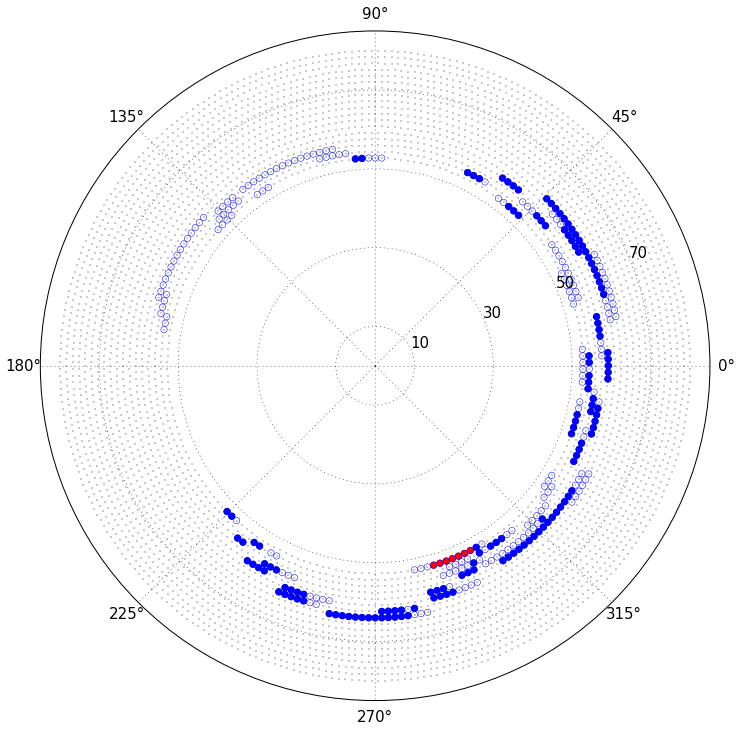

Event 1
1 94 344.019134521 1475.10205078 705.575457309
2 64 351.192596436 354.020141602 352.593737602
Regestered hits 108
Missed hits 0
All hits 158


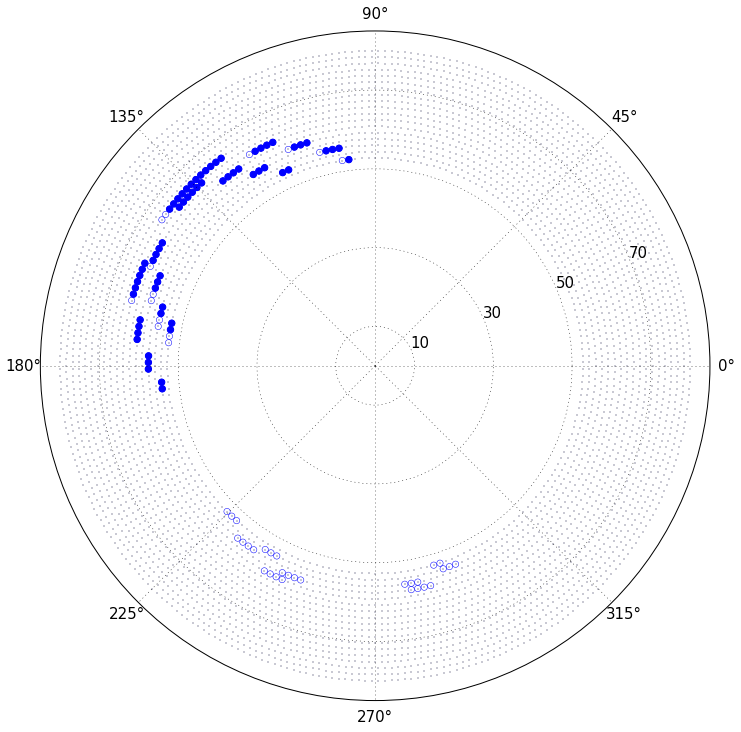

Event 2
0 1 430.677307129 430.677307129 430.677307129
1 106 430.254577637 1757.6262207 1000.52294893
2 29 1762.29638672 1763.69421387 1762.99556758
Regestered hits 109
Missed hits 1
All hits 136


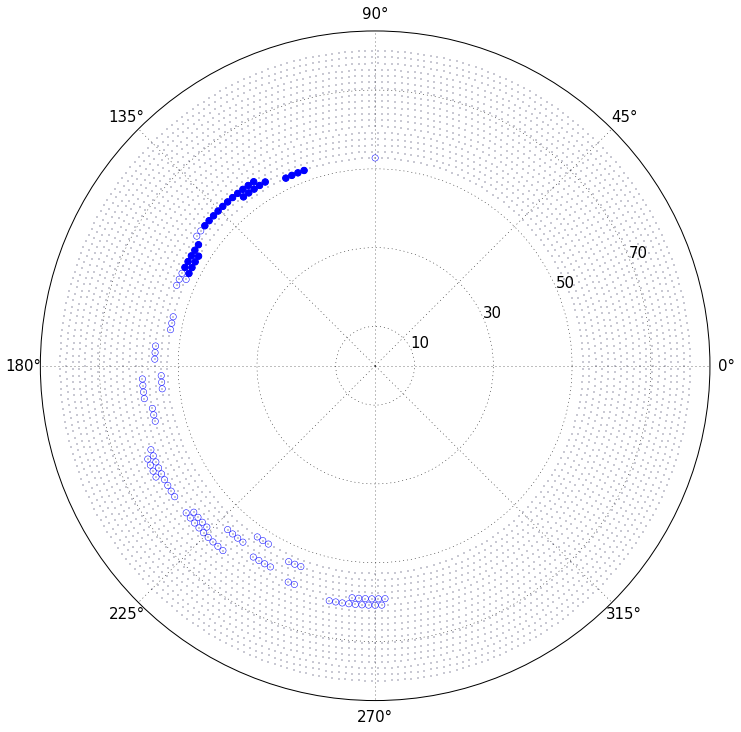

Event 3
1 96 606.997924805 1127.94555664 700.395280838
2 19 1131.85009766 1135.06616211 1133.53817588
3 18 1138.97021484 1142.19213867 1140.59185791
4 18 1146.03405762 1149.1862793 1147.61998155
5 18 1153.04785156 1156.1965332 1154.63789198
Regestered hits 135
Missed hits 0
All hits 169


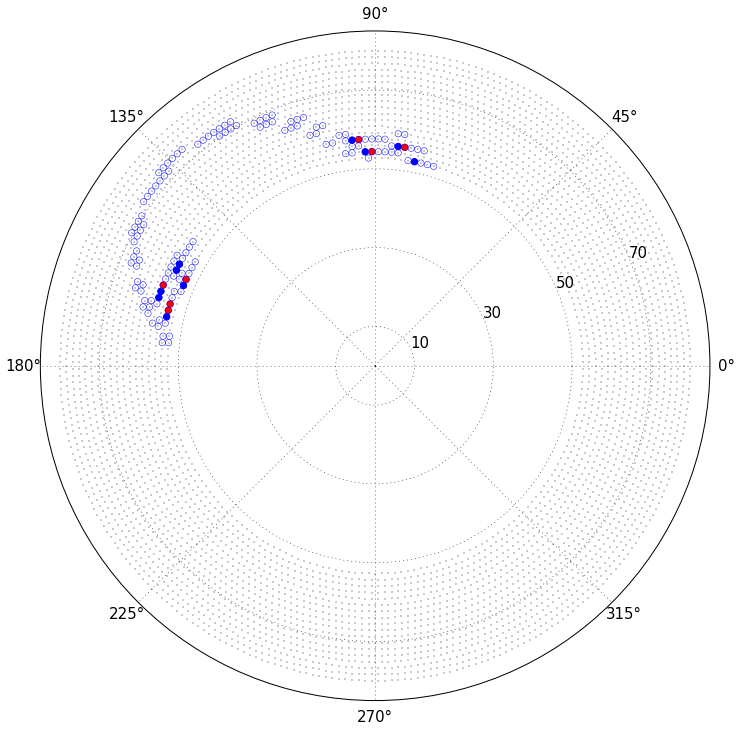

Event 4
1 9 1125.05786133 1127.57214355 1125.93513997
2 8 1132.20043945 1134.72998047 1133.16963196
3 8 1139.35180664 1141.83984375 1140.59509277
4 7 1146.45141602 1148.84863281 1147.79551479
5 9 1153.46411133 1155.86376953 1154.77731662
Regestered hits 27
Missed hits 0
All hits 41


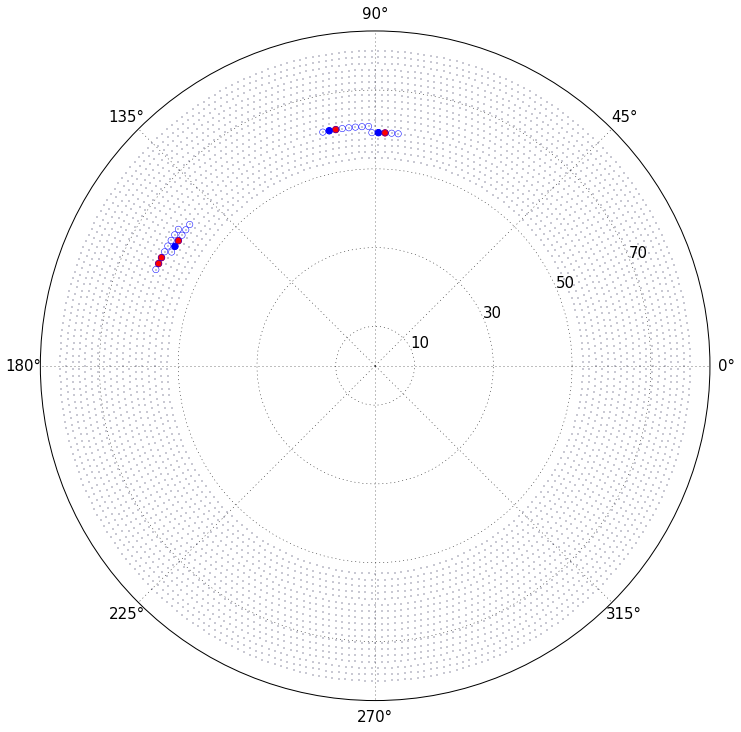

Event 5
1 8 1125.27246094 1127.515625 1126.62837219
2 8 1132.41137695 1134.64477539 1133.76602173
3 7 1139.52856445 1141.61352539 1140.17701939
4 9 1146.59423828 1148.61914062 1147.32735189
5 8 1153.64477539 1155.6595459 1154.43981934
Regestered hits 22
Missed hits 0
All hits 40


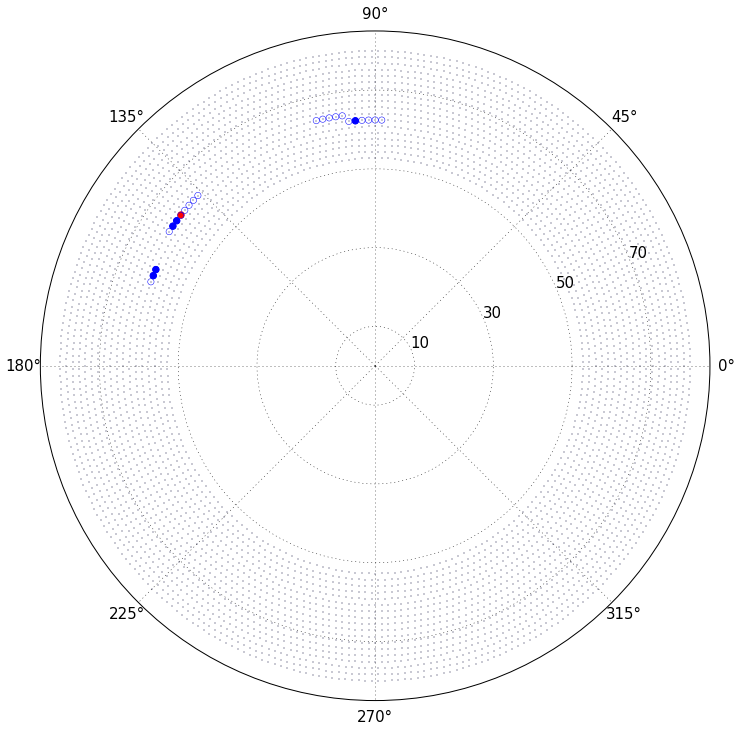

Event 6
1 23 1125.39526367 1127.26586914 1126.24024499
2 24 1132.56689453 1134.41430664 1133.44304403
3 22 1139.71606445 1141.47937012 1140.64525257
4 26 1146.83544922 1148.53271484 1147.68295523
5 24 1153.8762207 1155.5480957 1154.6598409
Regestered hits 57
Missed hits 0
All hits 119


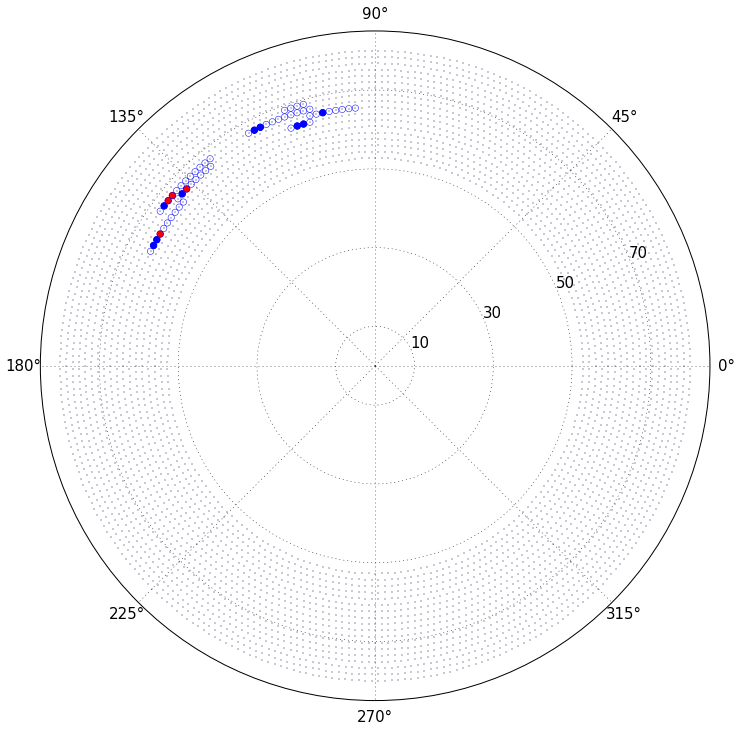

Event 7
0 4 826.44519043 1144.62939453 1063.53811646
1 343 209.519836426 1126.73864746 615.463133075
2 142 419.830505371 1133.88623047 743.784651635
3 138 426.44744873 1140.99707031 742.965991919
4 11 1147.43041992 1147.96582031 1147.69865279
5 11 1154.45141602 1155.00488281 1154.73773748
Regestered hits 418
Missed hits 4
All hits 649


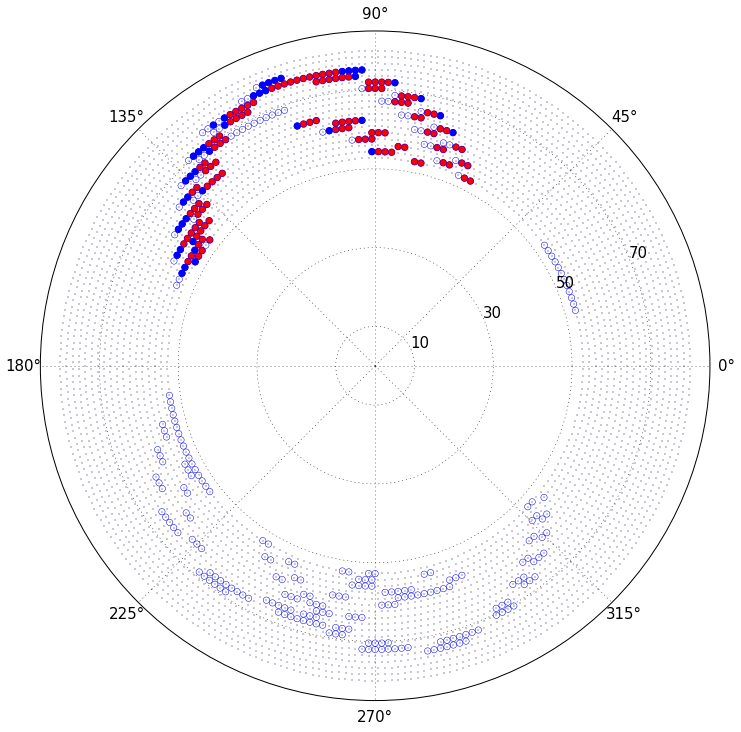

Event 8
1 20 414.070495605 415.212463379 414.609931946
2 21 420.761260986 421.844055176 421.309304374
3 21 427.374267578 428.37677002 427.882379441
Regestered hits 29
Missed hits 0
All hits 62


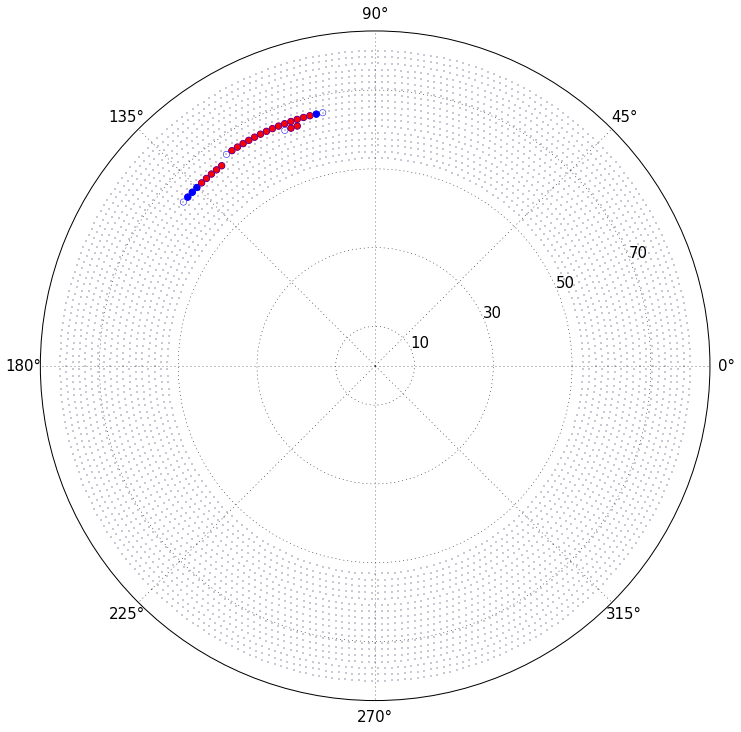

Event 9
1 71 414.494293213 2256.78955078 1186.7827329
2 1 421.636901855 421.636901855 421.636901855
Regestered hits 67
Missed hits 0
All hits 72


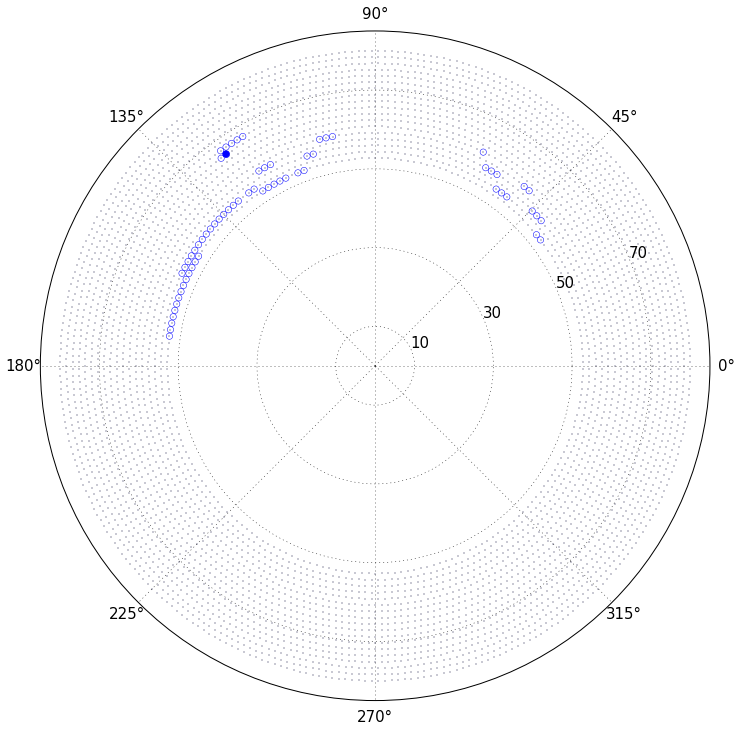

Event 11
0 1 1561.61083984 1561.61083984 1561.61083984
1 82 544.064697266 1563.92895508 1289.57806918
2 23 550.299316406 552.296569824 551.225944187
3 22 556.580566406 558.48223877 557.49010953
4 23 562.775390625 564.607543945 563.64513364
5 23 568.947814941 570.735717773 569.829098909
6 25 575.038330078 576.734130859 575.879929199
7 26 581.088134766 582.746826172 581.945666973
Regestered hits 105
Missed hits 1
All hits 225


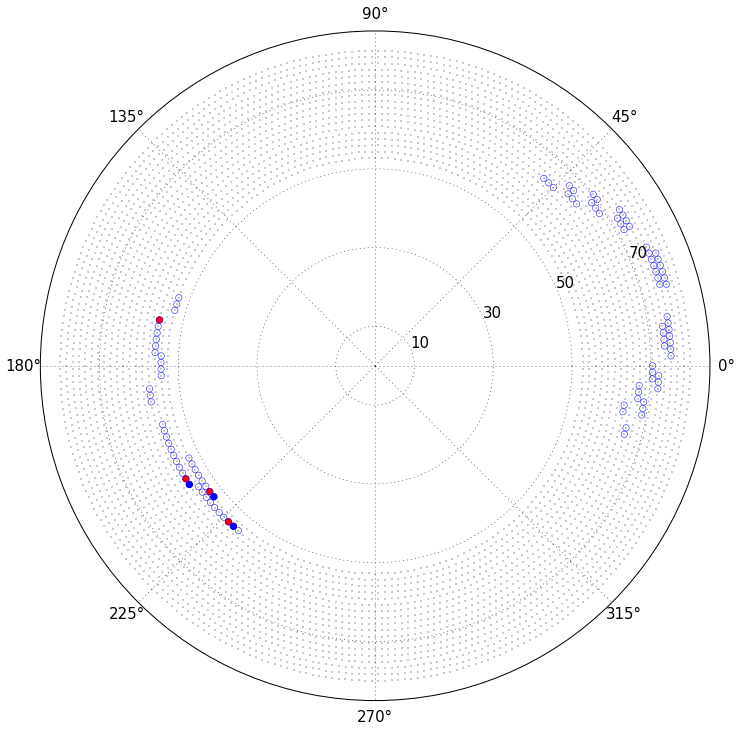

Event 12
1 30 544.568115234 1730.57299805 900.523935954
2 23 550.875976562 1731.5880127 705.331792417
3 19 557.137512207 558.056884766 557.576387104
4 19 563.357849121 564.181762695 563.768239875
5 14 569.519287109 570.263183594 569.893807547
6 12 575.62298584 576.219238281 575.93653361
7 12 581.67175293 587.426818848 582.411422729
Regestered hits 45
Missed hits 0
All hits 129


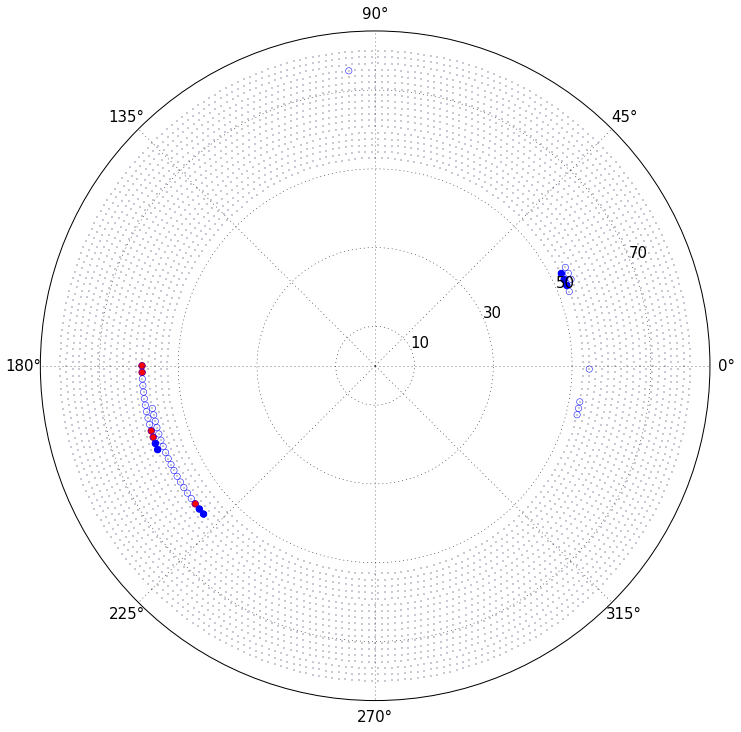

Event 14
1 32 266.627563477 739.764648438 414.51030159
2 11 744.192504883 747.025695801 745.727733265
Regestered hits 39
Missed hits 0
All hits 43


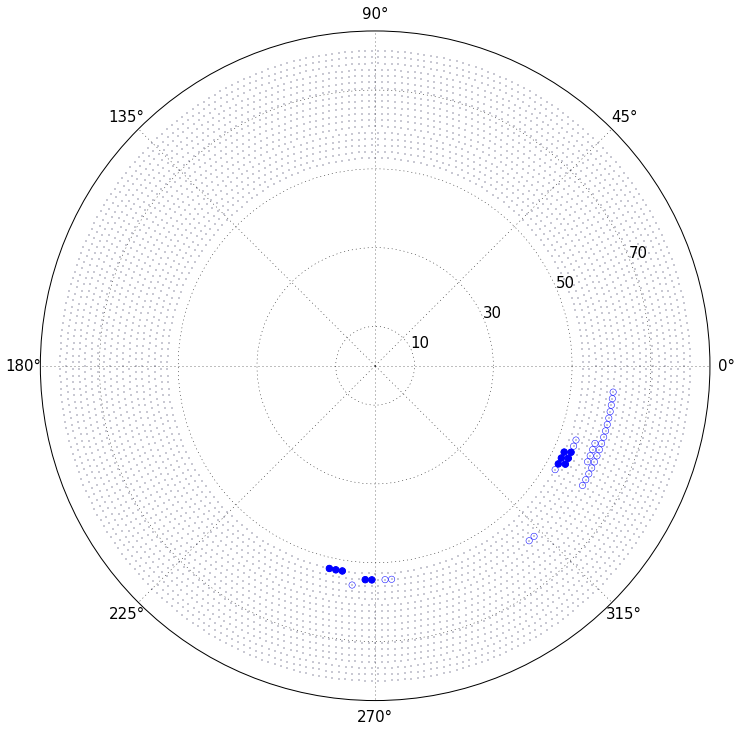

Event 15
0 14 766.819519043 775.616088867 771.215567453
1 137 737.291015625 1299.19116211 1054.99420968
2 51 744.402404785 746.821655273 745.610940372
Regestered hits 163
Missed hits 14
All hits 202


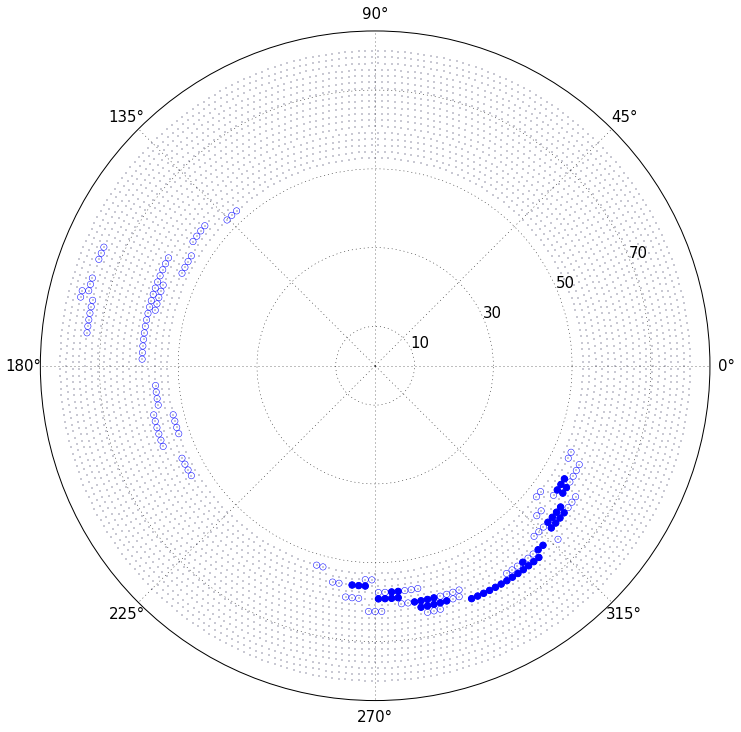

Event 16
1 93 155.664520264 1140.04260254 445.456867505
2 34 162.228546143 164.167785645 163.197434369
Regestered hits 115
Missed hits 0
All hits 127


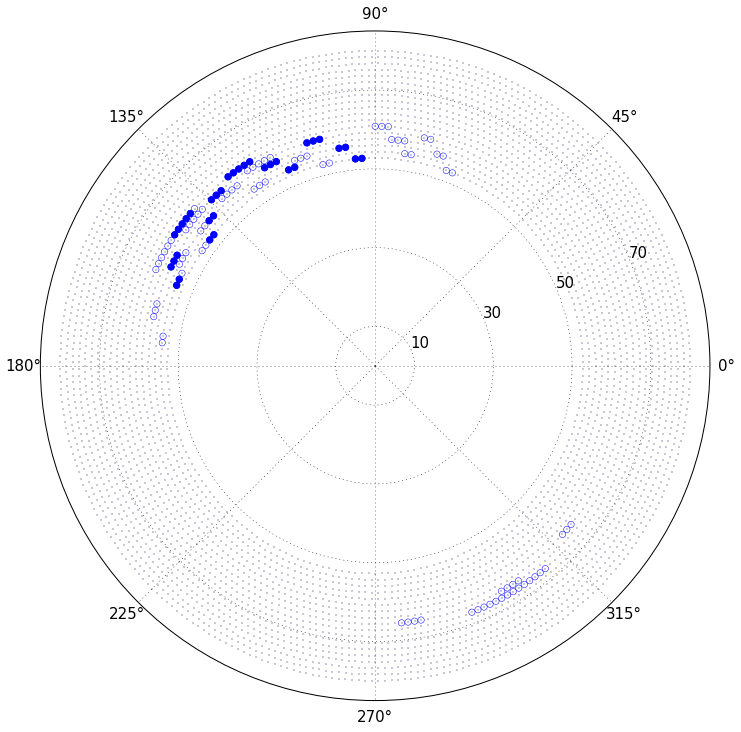

Event 17
0 4 213.635147095 215.331878662 214.356647491
1 54 156.188858032 576.26184082 188.254645171
2 9 162.962493896 163.401138306 163.186911689
Regestered hits 67
Missed hits 4
All hits 67


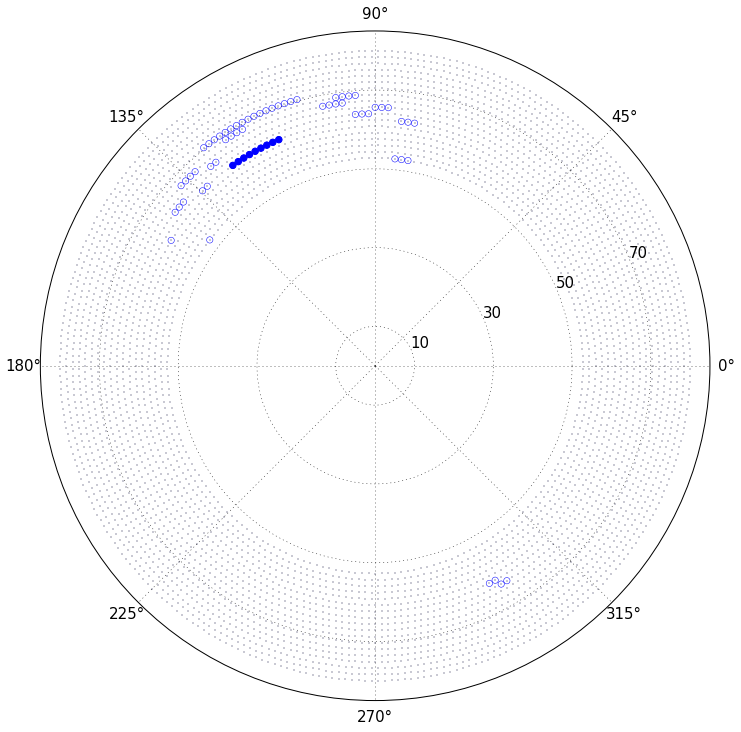

Event 19
1 61 584.383850098 1024.72875977 858.258086658
2 1 1142.31323242 1142.31323242 1142.31323242
3 1 1148.59765625 1148.59765625 1148.59765625
4 1 1154.8638916 1154.8638916 1154.8638916
5 1 1161.04370117 1161.04370117 1161.04370117
Regestered hits 62
Missed hits 0
All hits 65


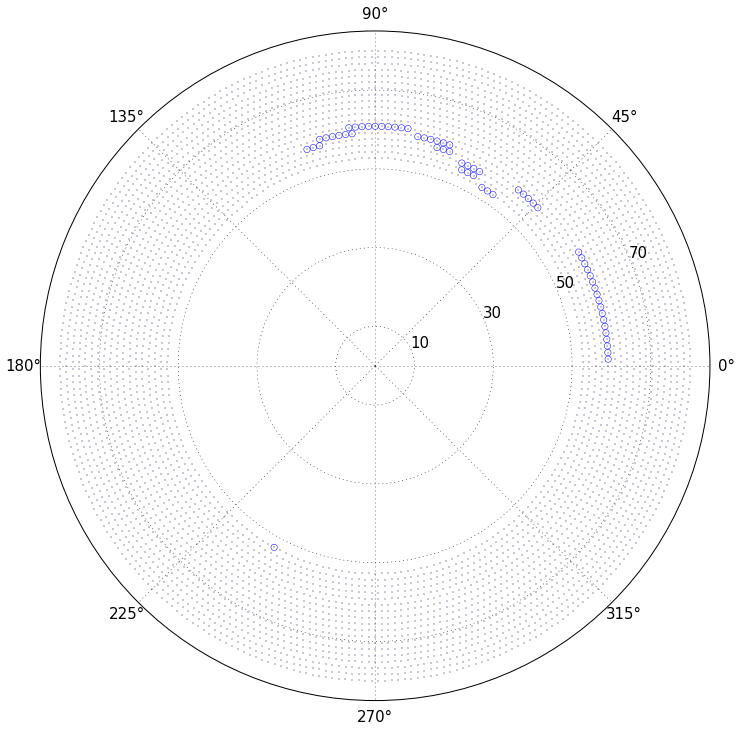

Event 20
1 1 1135.98828125 1135.98828125 1135.98828125
2 1 1142.34912109 1142.34912109 1142.34912109
3 1 1148.65429688 1148.65429688 1148.65429688
Regestered hits 1
Missed hits 0
All hits 3


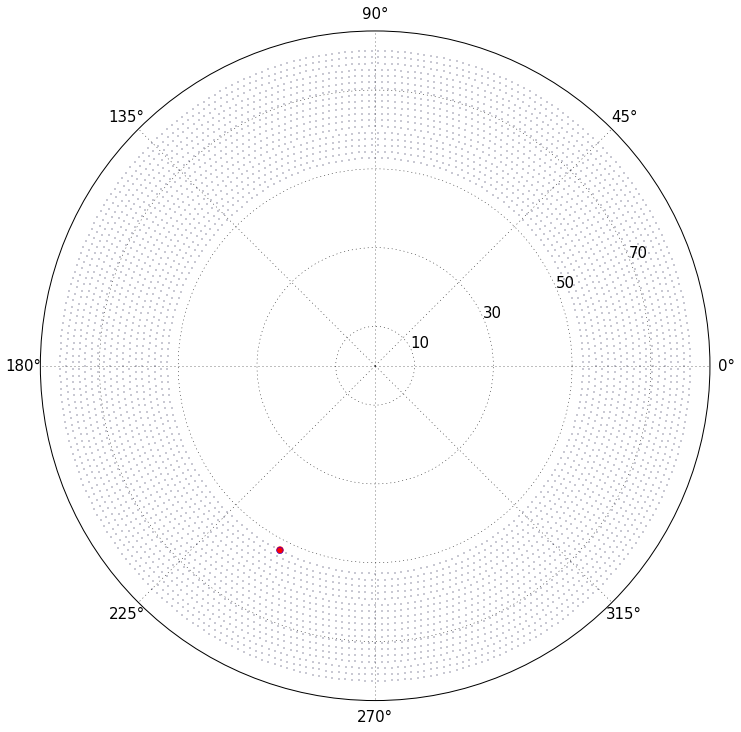

Event 21
0 3 246.651824951 1152.94567871 845.999704997
1 288 239.246810913 1494.88647461 906.808165921
2 133 246.448547363 1144.99047852 645.38998654
3 61 1148.67749023 1151.24365234 1149.93612321
4 53 1154.8972168 1157.4387207 1156.20200564
5 56 1161.10144043 1163.67578125 1162.37768337
Regestered hits 363
Missed hits 3
All hits 594


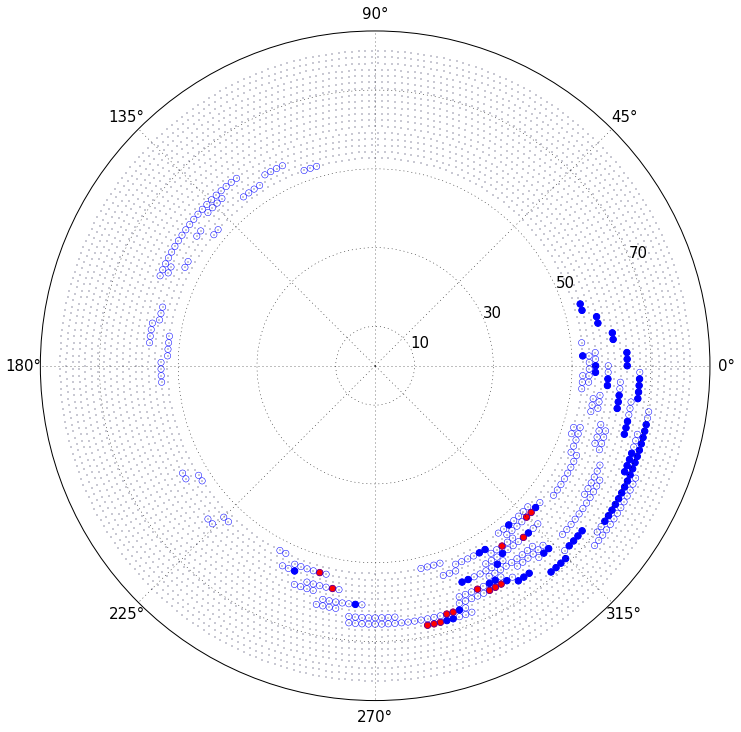

Event 23
1 119 435.714477539 2622.00537109 1499.7140167
2 76 1528.81298828 2628.37036133 2093.38881001
3 36 2632.93066406 2634.56884766 2633.74492052
Regestered hits 172
Missed hits 0
All hits 231


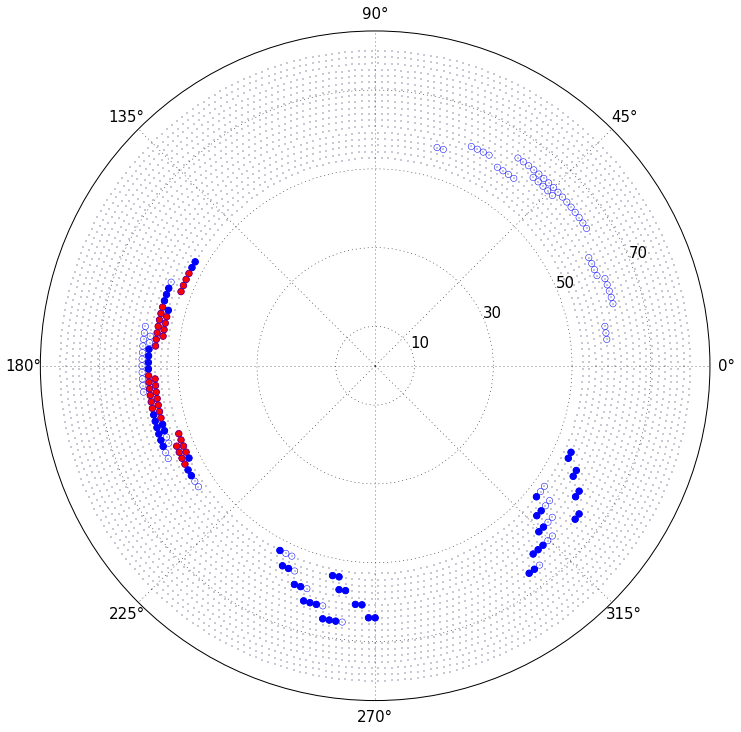

Event 24
1 25 1522.42382812 1524.5012207 1523.39868164
2 28 1529.56445312 1531.62780762 1530.52340698
Regestered hits 35
Missed hits 0
All hits 53


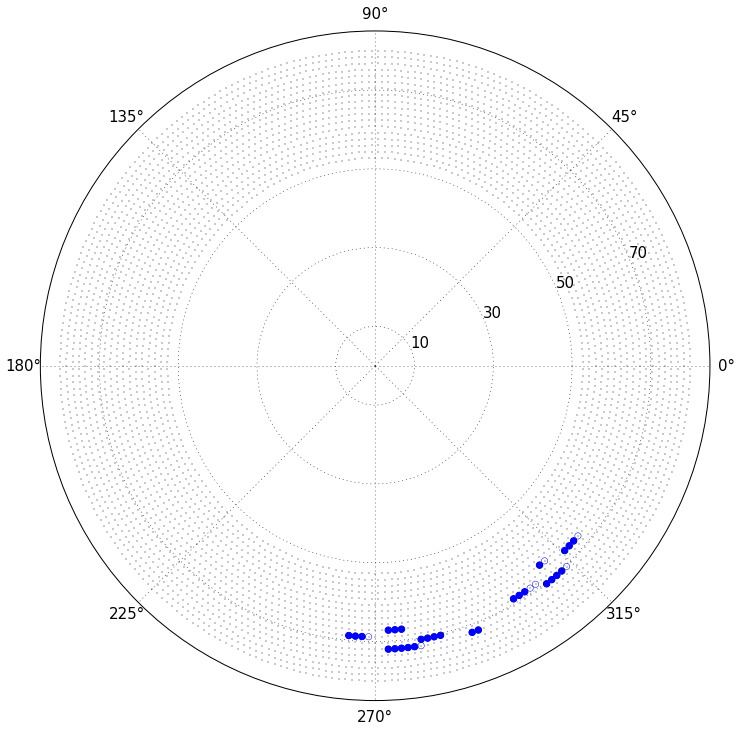

Event 25
0 1 347.809265137 347.809265137 347.809265137
1 150 225.242034912 1639.16430664 671.866829224
2 22 1530.3059082 1611.96496582 1559.58976052
3 6 1616.24682617 1619.05688477 1617.2273763
4 7 1623.39233398 1626.23681641 1624.25524902
Regestered hits 153
Missed hits 1
All hits 186


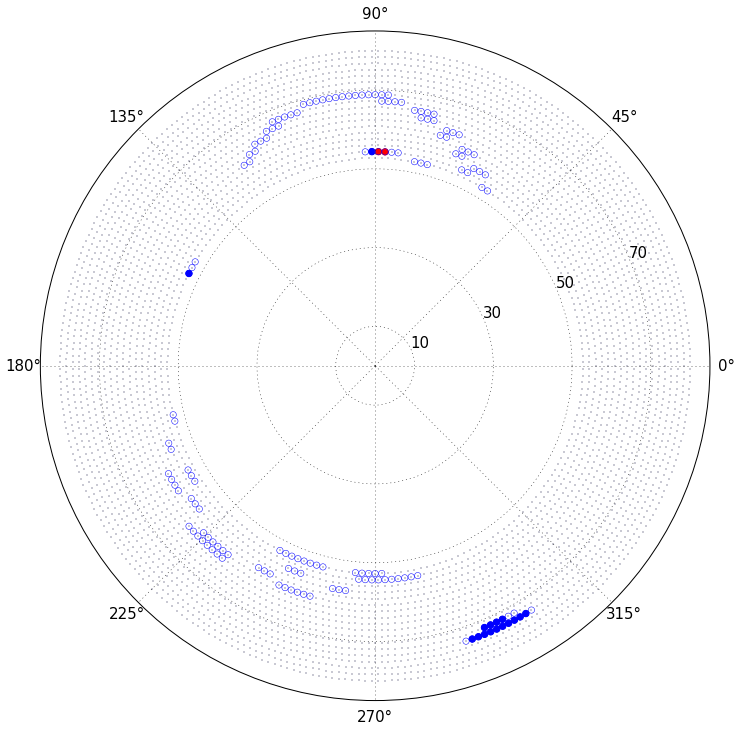

Event 26
1 3 1602.14672852 1604.66516113 1603.81429036
2 3 1609.30688477 1611.82714844 1610.97566732
3 3 1618.91564941 1619.00341797 1618.95629883
4 2 1626.06115723 1626.12792969 1626.09454346
Regestered hits 9
Missed hits 0
All hits 11


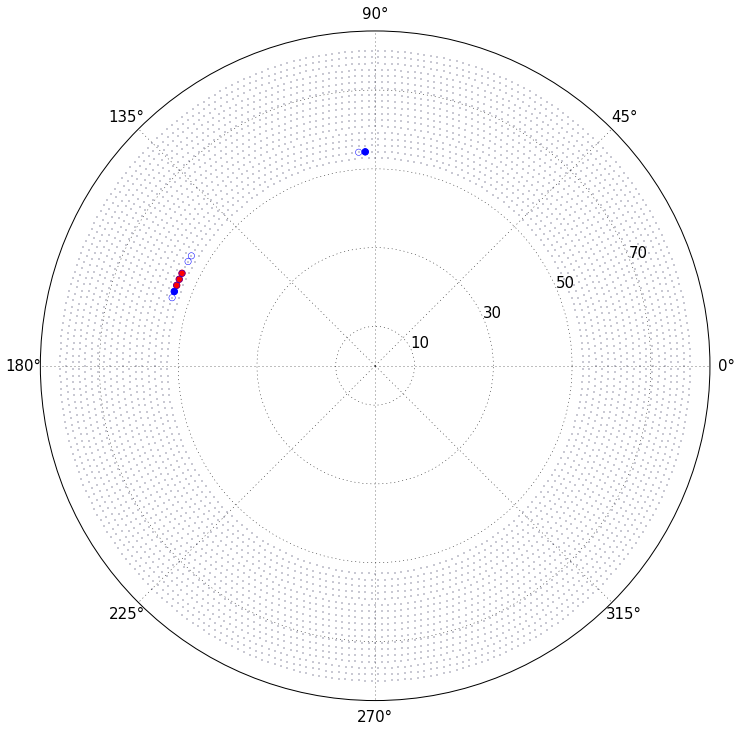

Event 27
1 9 1602.18798828 1604.71777344 1603.06781684
2 9 1609.36010742 1611.88061523 1610.47370063
3 9 1616.44970703 1618.89160156 1617.31431749
4 9 1623.63378906 1626.03540039 1624.71303982
Regestered hits 18
Missed hits 0
All hits 36


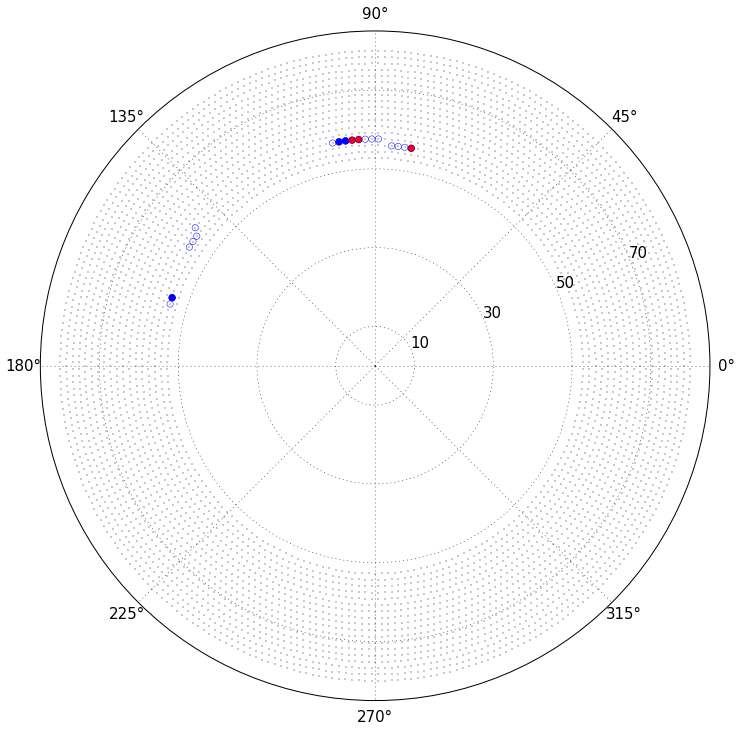

Event 28
1 9 1602.43237305 1604.45947266 1603.72840712
2 11 1609.56518555 1611.65026855 1610.66902299
3 12 1616.68823242 1618.74291992 1617.72855632
4 13 1623.84667969 1625.91064453 1624.68235427
Regestered hits 21
Missed hits 0
All hits 45


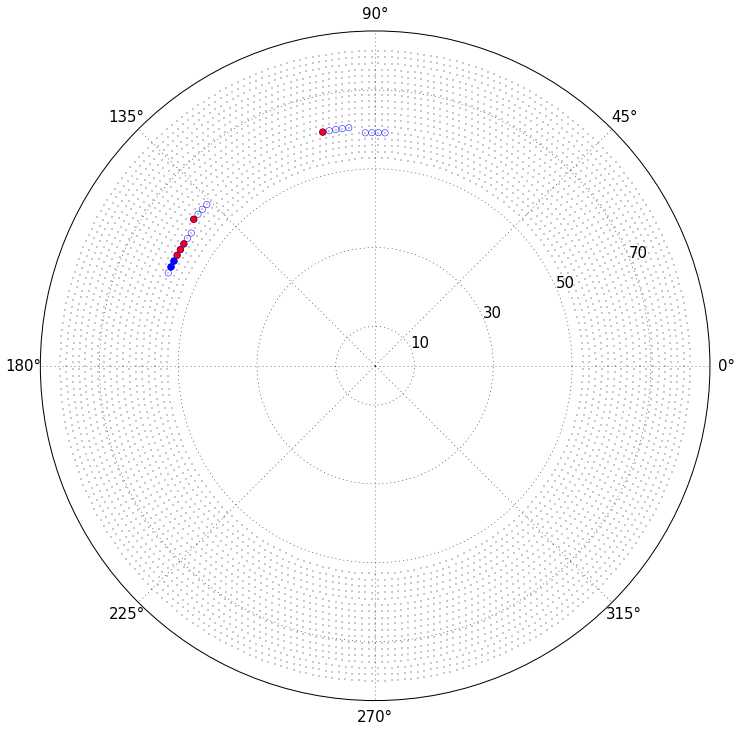

Event 29
1 14 1602.5793457 1604.1940918 1603.15957206
2 11 1609.77709961 1611.3762207 1610.4128196
3 9 1616.9654541 1618.5012207 1617.529324
4 9 1624.17407227 1625.6394043 1624.85712348
Regestered hits 21
Missed hits 0
All hits 43


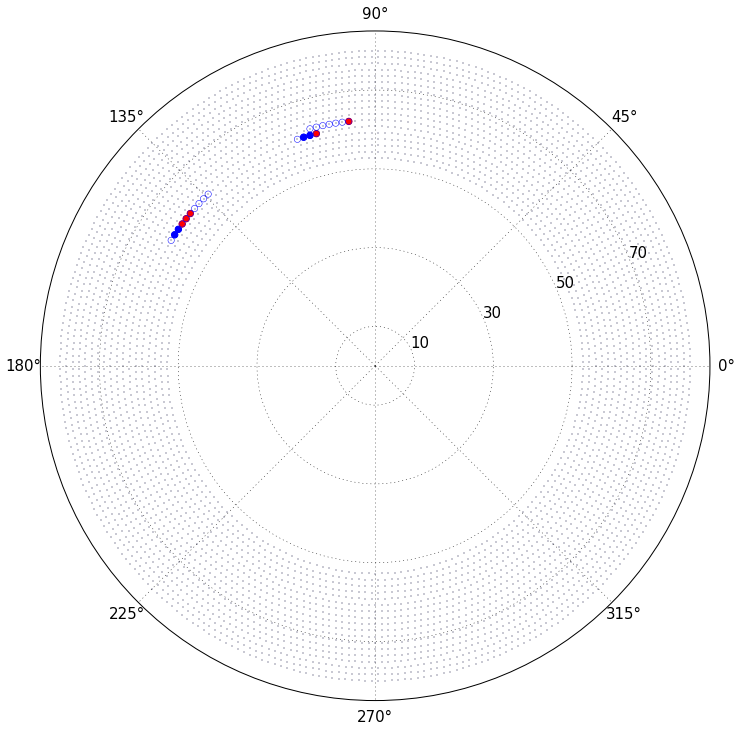

Event 30
0 2 1618.69604492 1620.42797852 1619.56201172
1 284 247.067428589 2734.01416016 1189.17089489
2 22 1610.10864258 1611.21191406 1610.67391135
3 22 1617.22607422 1618.3347168 1617.79326283
4 20 1624.42285156 1625.44018555 1624.9375
Regestered hits 287
Missed hits 0
All hits 350


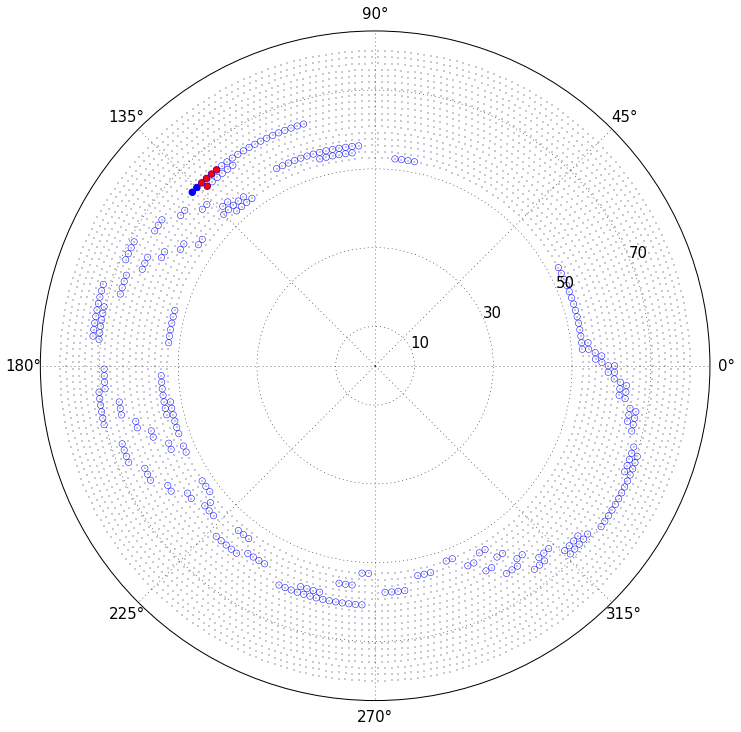

Event 31
1 51 188.207473755 833.028747559 214.86335515
2 52 195.505859375 198.197235107 196.854124803
3 54 202.615097046 205.192199707 203.890506321
Regestered hits 109
Missed hits 0
All hits 157


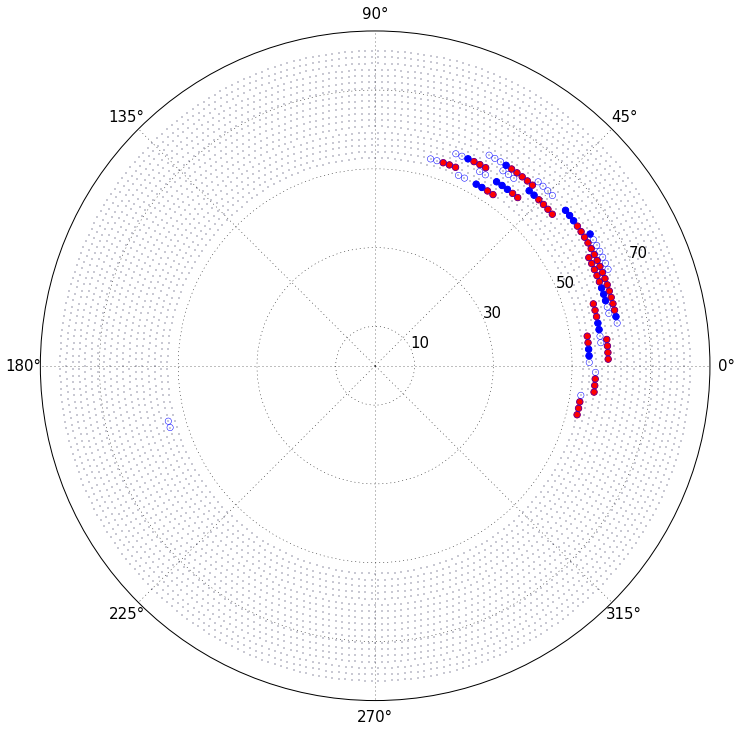

Event 32
1 39 189.477294922 367.639038086 294.086333837
2 6 196.706054688 197.004714966 196.856595357
Regestered hits 45
Missed hits 0
All hits 45


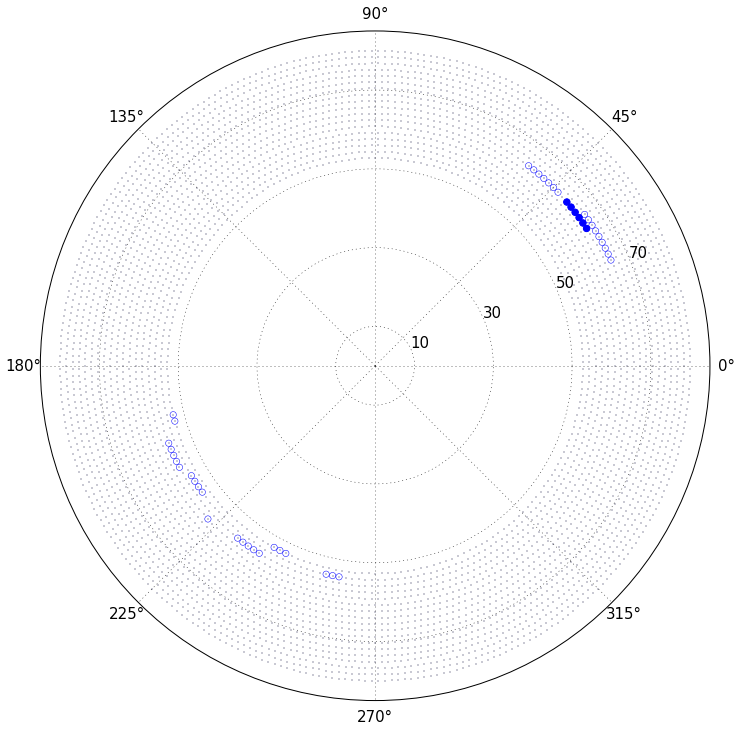

Event 35
1 20 162.380737305 403.522705078 175.893132782
2 21 169.592987061 172.318756104 171.092279343
3 24 176.795074463 179.467315674 178.199427287
Regestered hits 41
Missed hits 0
All hits 65


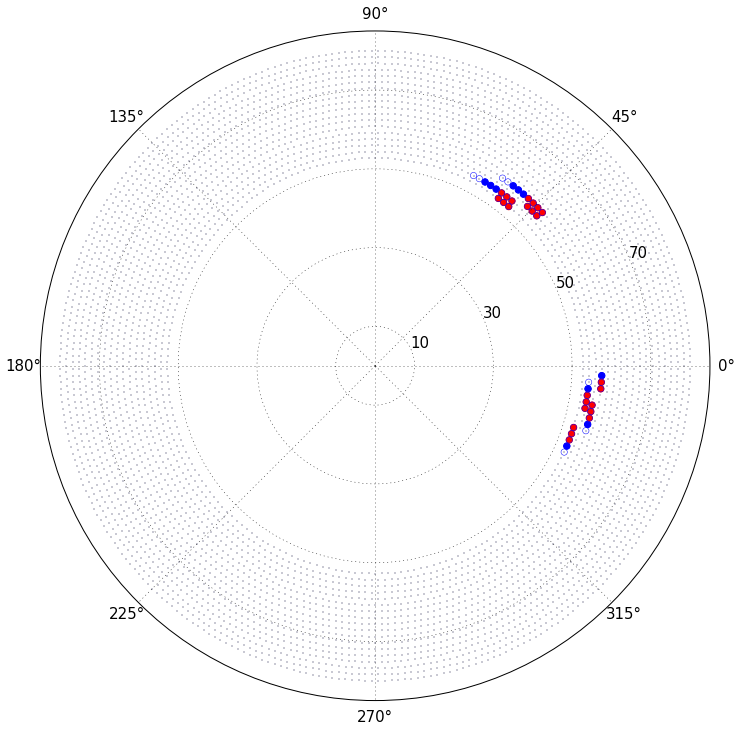

Event 36
1 15 162.72277832 164.666015625 163.396762085
2 15 170.004882812 171.815734863 170.60395813
3 19 177.218841553 178.9322052 178.058620252
Regestered hits 26
Missed hits 0
All hits 49


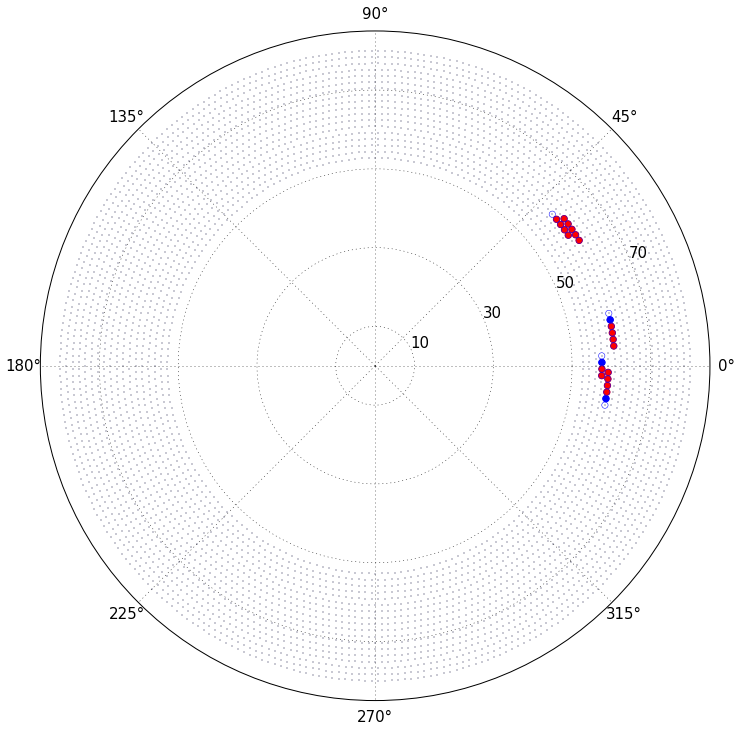

Event 37
1 41 163.228851318 392.939575195 252.90976957
2 23 170.469665527 171.656982422 171.067833278
3 16 177.477508545 178.49168396 178.069748878
Regestered hits 50
Missed hits 0
All hits 80


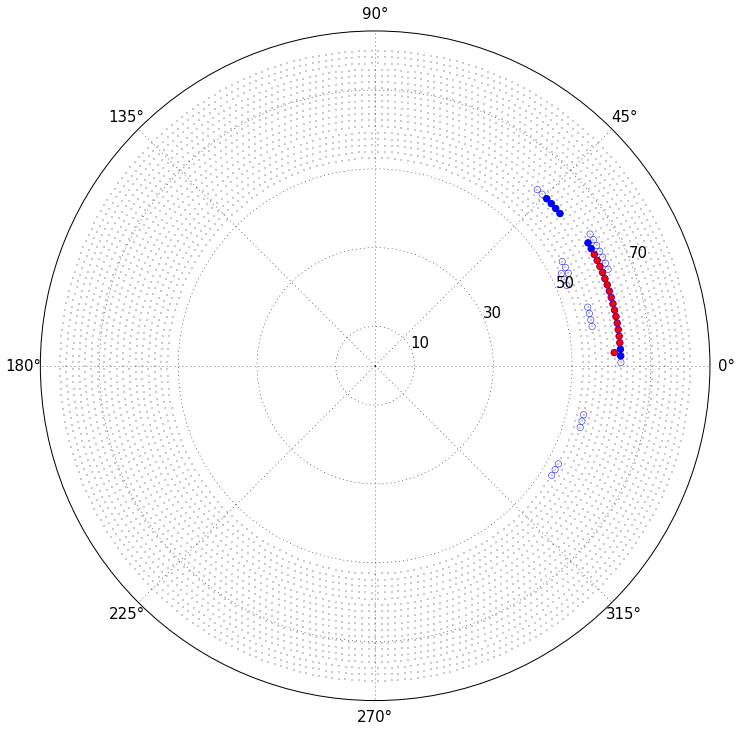

Event 39
1 29 690.492553711 902.087463379 843.548632392
2 9 697.668395996 700.515441895 698.670552572
Regestered hits 34
Missed hits 0
All hits 38


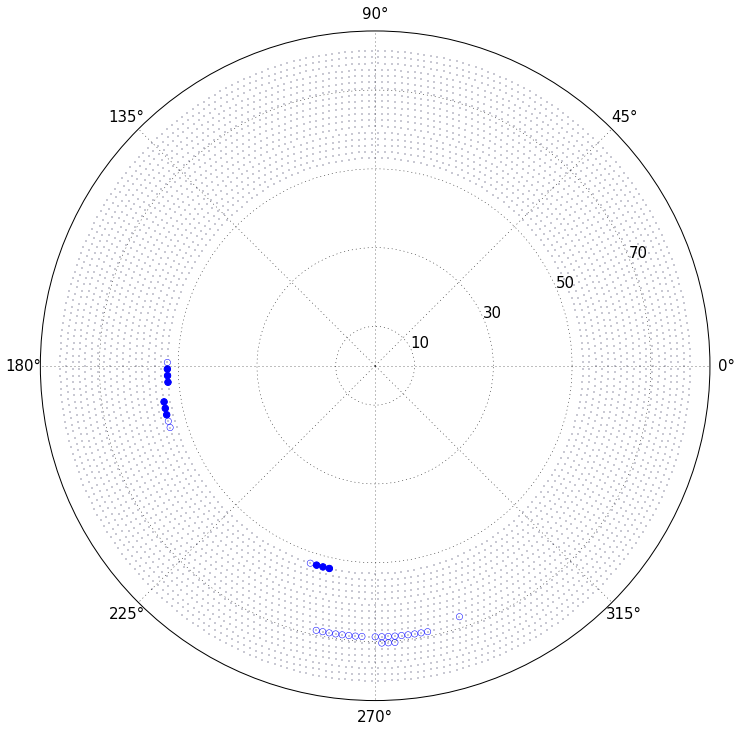

Event 40
1 46 690.661499023 693.124694824 691.899302607
2 48 697.880493164 700.40612793 699.097503662
Regestered hits 75
Missed hits 0
All hits 94


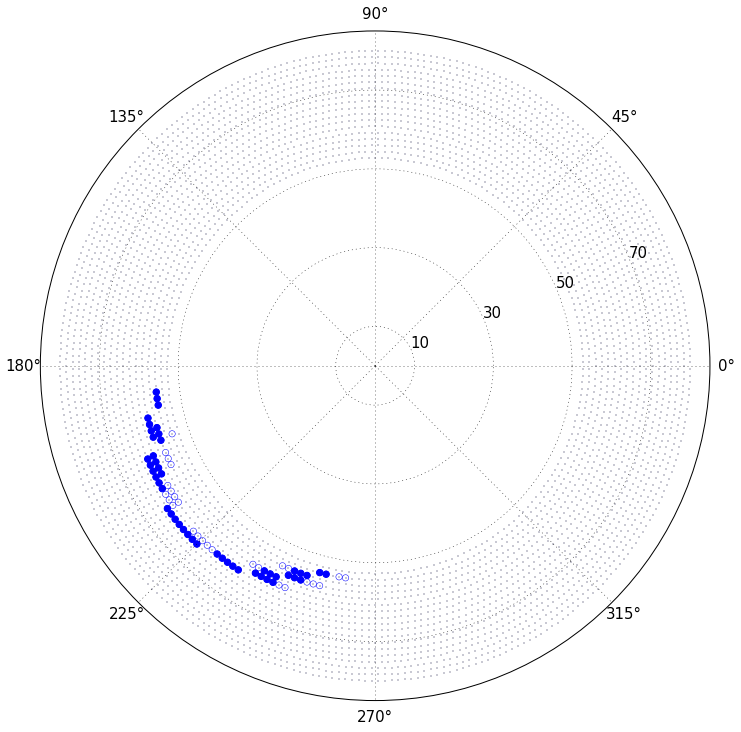

Event 41
0 2 751.432983398 751.940124512 751.686553955
1 132 380.417114258 3740.51855469 1697.29747842
2 5 699.202270508 699.434448242 699.327819824
Regestered hits 129
Missed hits 0
All hits 139


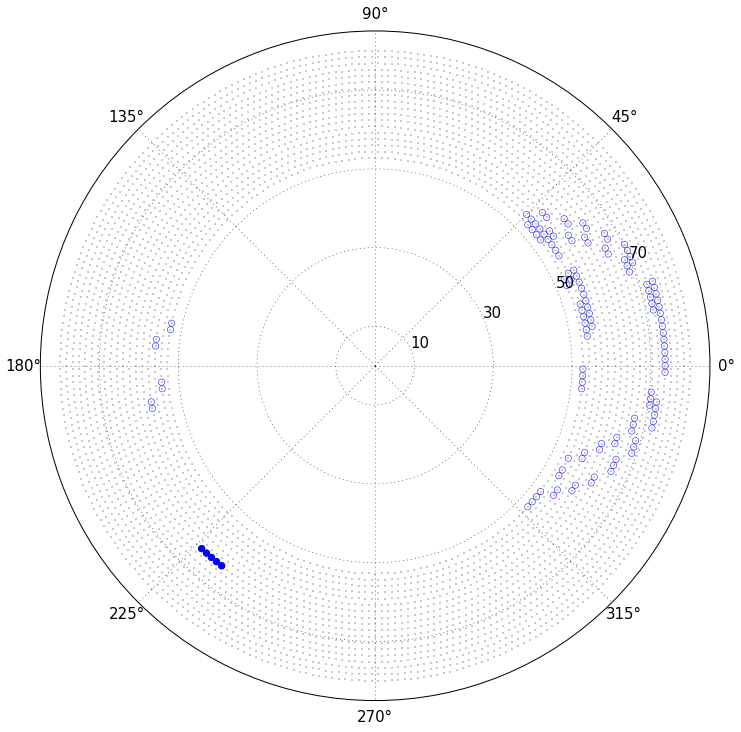

Event 42
0 1 307.529846191 307.529846191 307.529846191
1 455 297.187438965 2758.1875 1391.60989413
2 106 304.403076172 2407.24804688 1038.9892938
Regestered hits 464
Missed hits 1
All hits 562


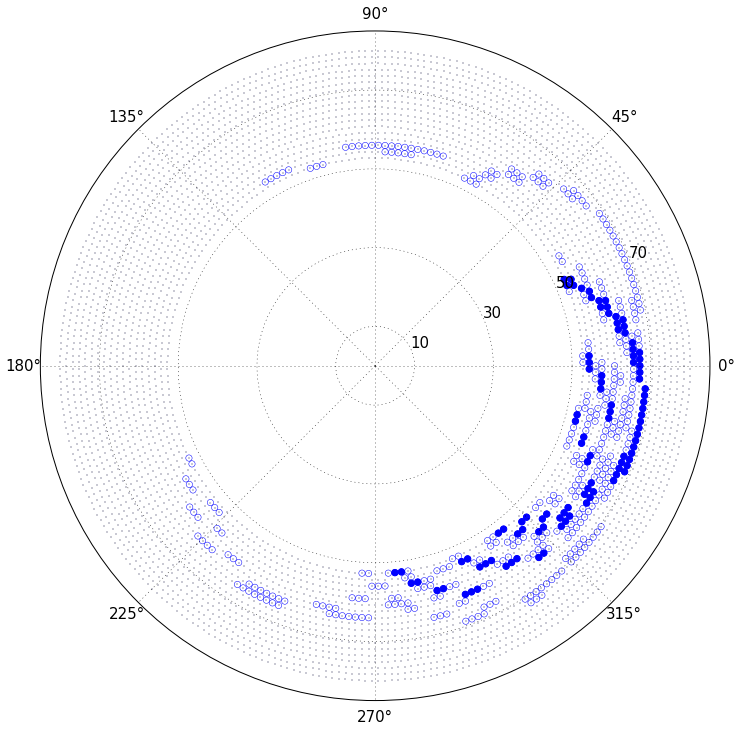

Event 43
0 1 971.928955078 971.928955078 971.928955078
1 121 528.909057617 2399.79736328 991.732663998
2 78 536.100708008 2406.48242188 1088.3784704
Regestered hits 135
Missed hits 1
All hits 200


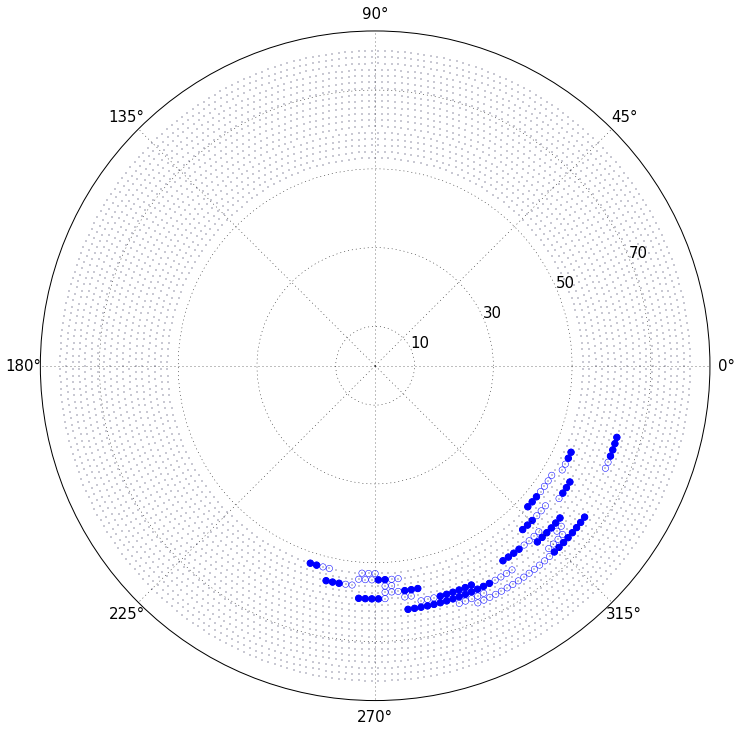

Event 45
1 96 767.640441895 2725.9831543 2056.59385872
2 54 2729.90429688 2733.13867188 2731.47419343
Regestered hits 119
Missed hits 0
All hits 150


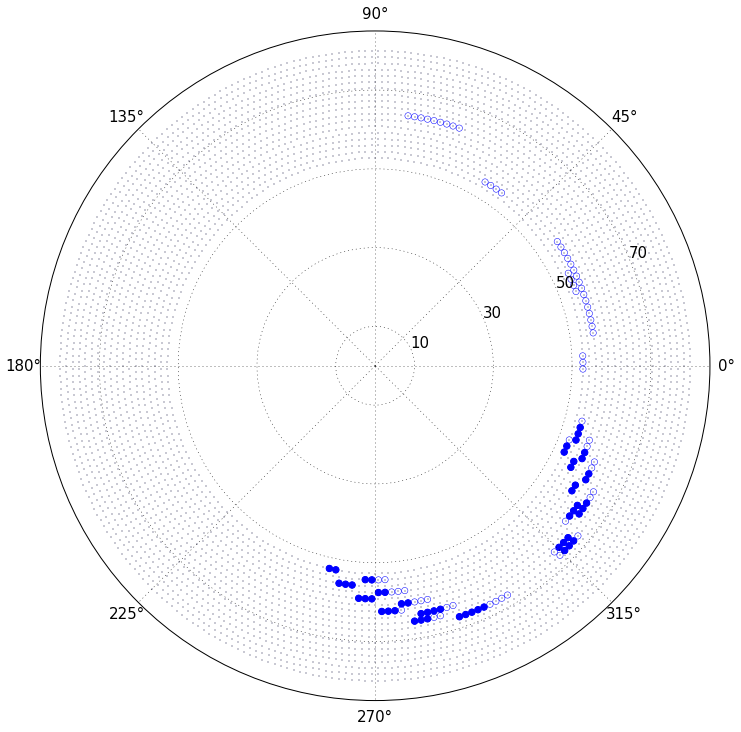

Event 46
0 1 2731.88256836 2731.88256836 2731.88256836
1 88 171.521362305 2724.93823242 524.002146114
2 17 2731.10742188 2732.16381836 2731.57205021
Regestered hits 85
Missed hits 0
All hits 106


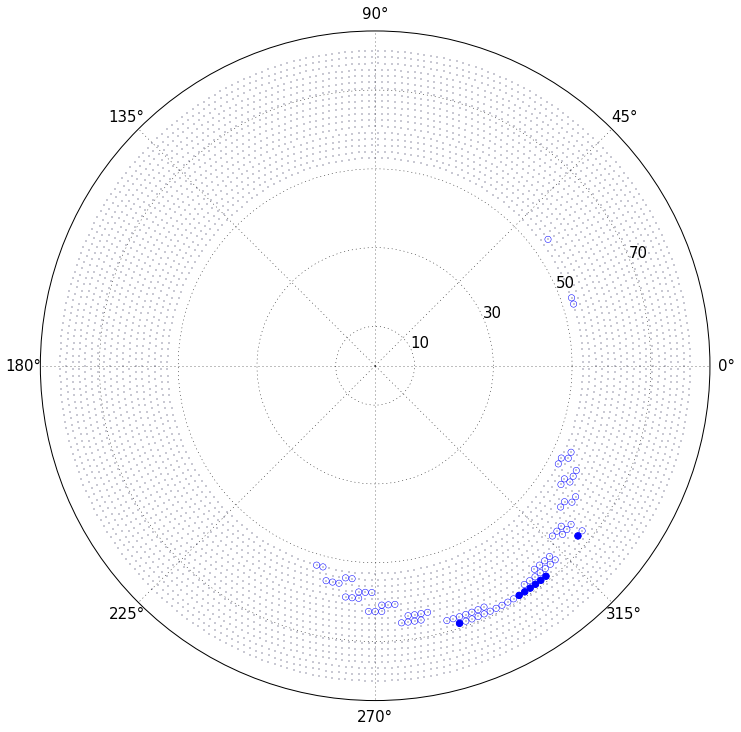

Event 50
0 2 1604.66235352 1605.98876953 1605.32556152
1 174 240.806762695 1606.95800781 805.080835189
2 109 247.878097534 536.317993164 335.94556756
Regestered hits 238
Missed hits 2
All hits 285


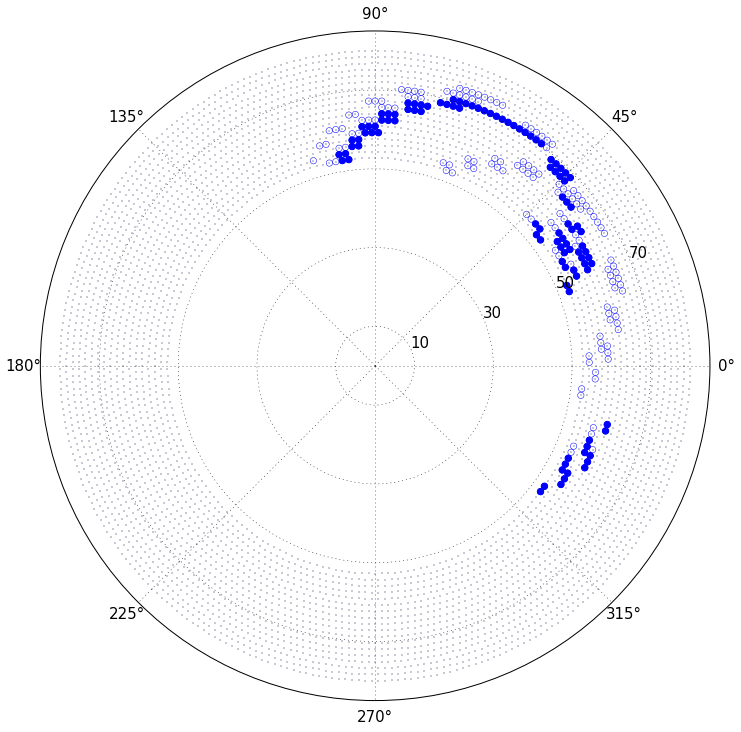

Event 51
0 1 522.676879883 522.676879883 522.676879883
1 91 384.015625 528.45715332 507.598239102
2 31 534.113342285 535.596923828 534.857299805
Regestered hits 96
Missed hits 1
All hits 123


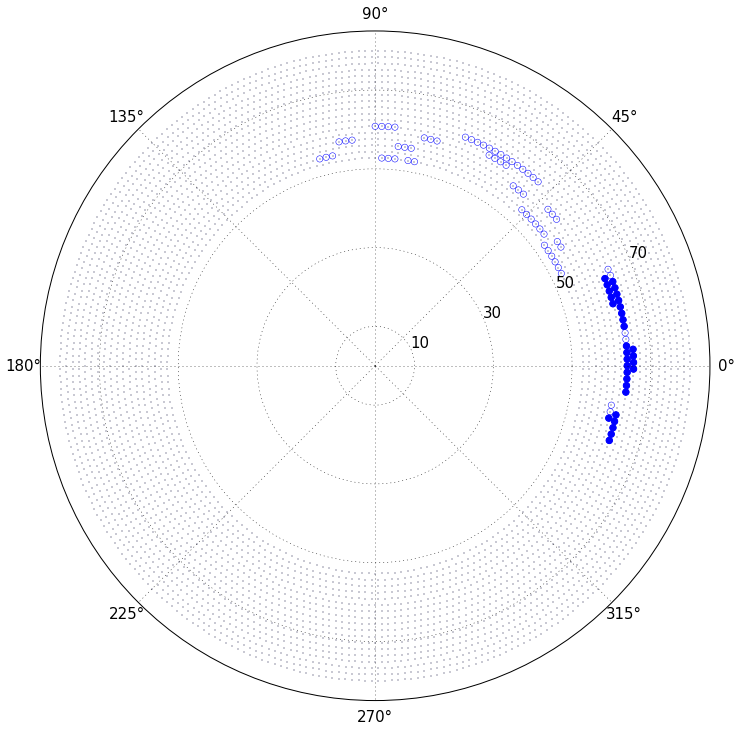

Event 53
1 60 384.433776855 907.728271484 622.044930013
2 16 911.504394531 914.891540527 913.195213318
Regestered hits 69
Missed hits 0
All hits 76


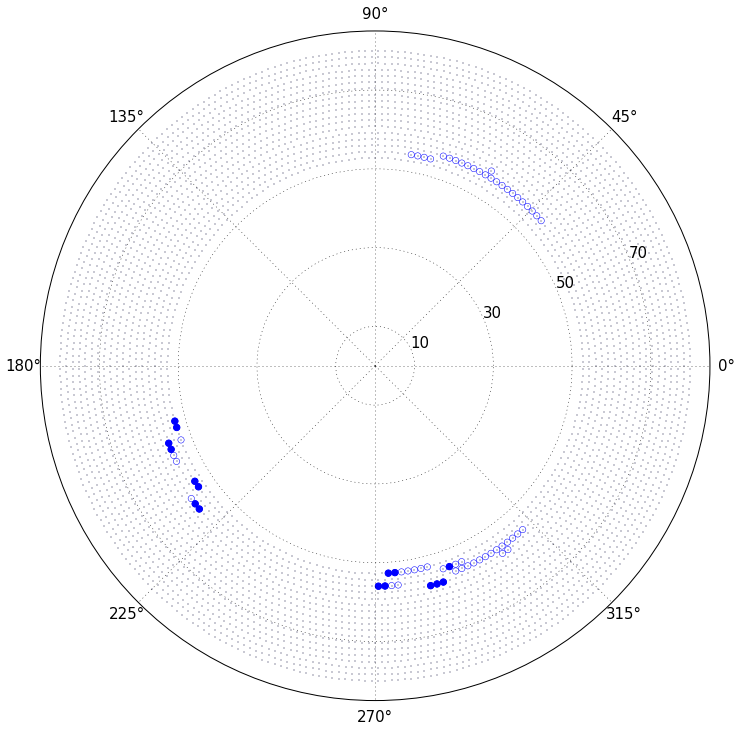

Event 54
1 266 238.022216797 1527.29370117 1043.74088419
2 102 911.831665039 975.492858887 939.332244275
Regestered hits 299
Missed hits 0
All hits 368


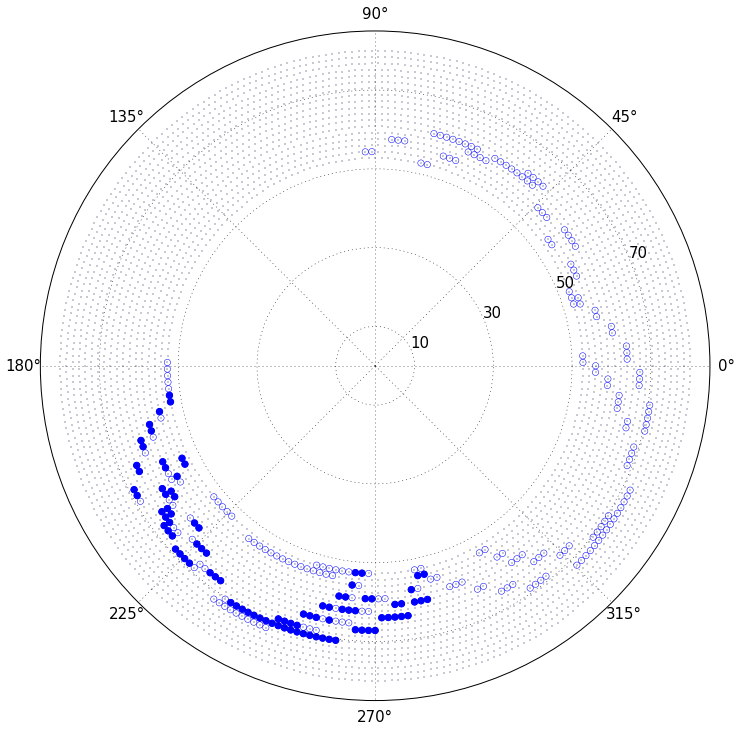

Event 55
1 35 965.751831055 967.74597168 966.691634696
2 35 972.765380859 974.587768555 973.669294085
Regestered hits 45
Missed hits 0
All hits 70


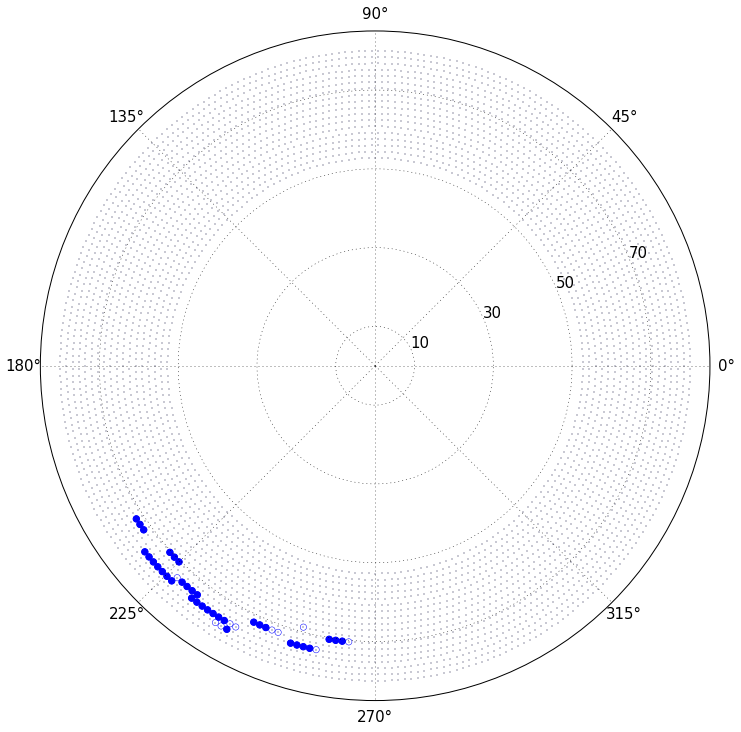

Event 56
1 72 597.89630127 2392.46386719 1406.09968228
2 4 973.631103516 973.758056641 973.69619751
Regestered hits 72
Missed hits 0
All hits 76


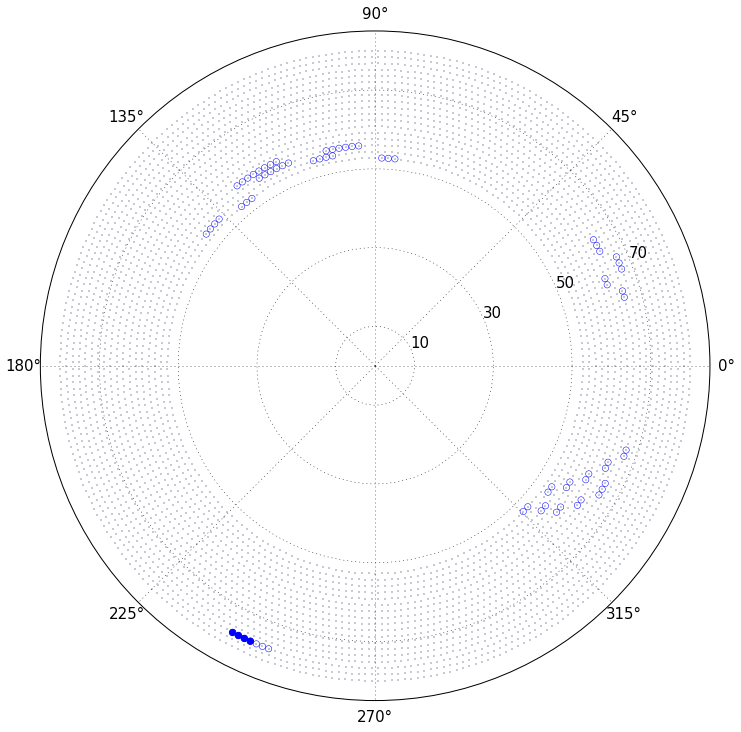

Event 61
1 35 405.237976074 1513.60009766 721.840081787
2 10 1517.34008789 1520.75463867 1518.73579102
Regestered hits 39
Missed hits 0
All hits 45


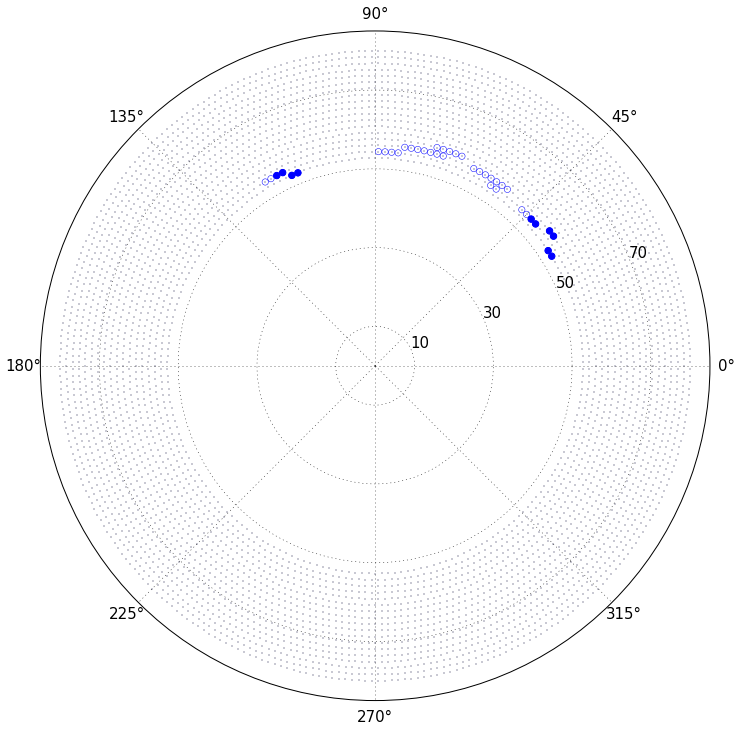

Event 62
1 23 1510.40039062 1513.41748047 1512.07390561
2 23 1517.5793457 1520.57324219 1519.02561884
Regestered hits 33
Missed hits 0
All hits 46


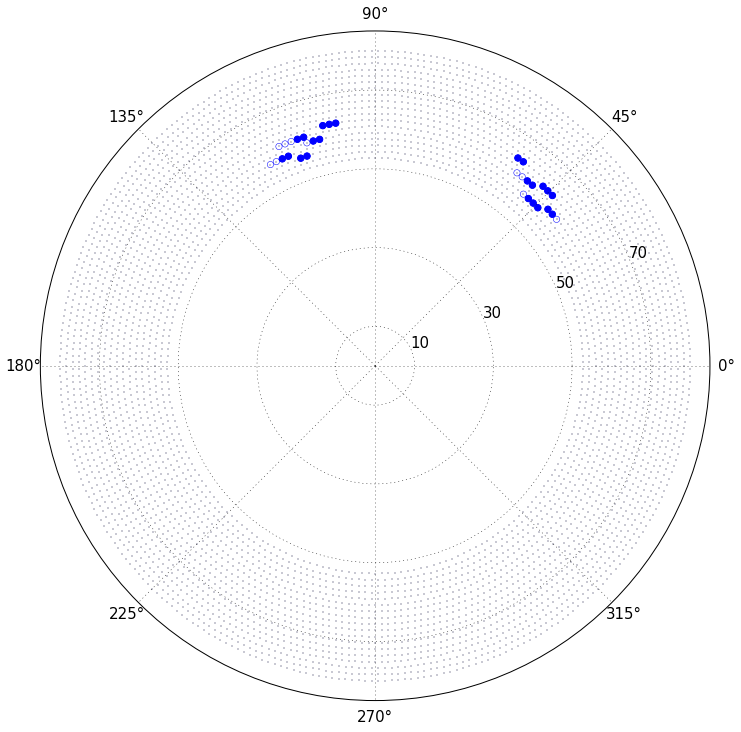

Event 63
1 14 1510.81054688 1512.9621582 1511.76030622
2 14 1518.07885742 1520.12817383 1519.20280239
Regestered hits 22
Missed hits 0
All hits 28


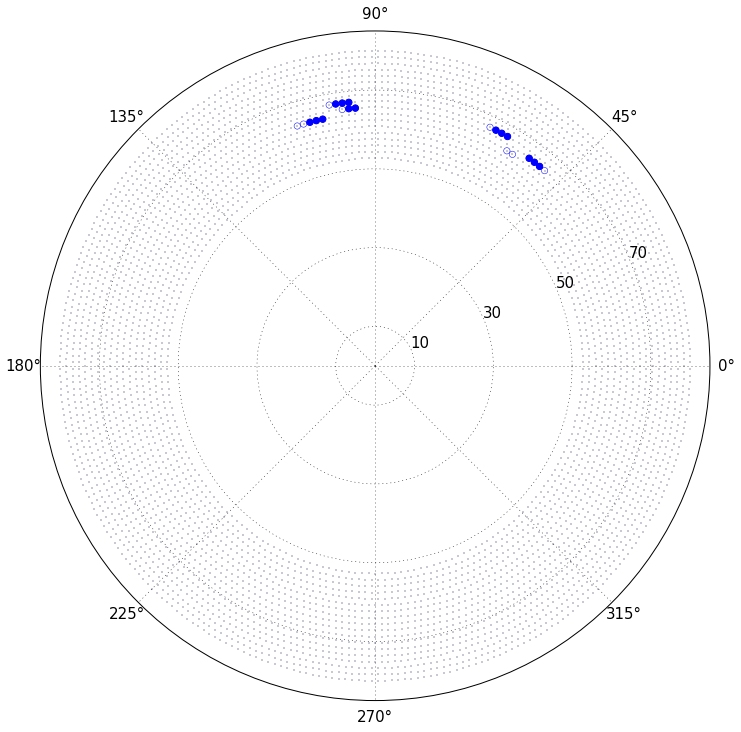

Event 64
1 26 1511.1640625 1512.74450684 1511.90377573
2 27 1518.36254883 1519.71948242 1519.01587818
Regestered hits 35
Missed hits 0
All hits 53


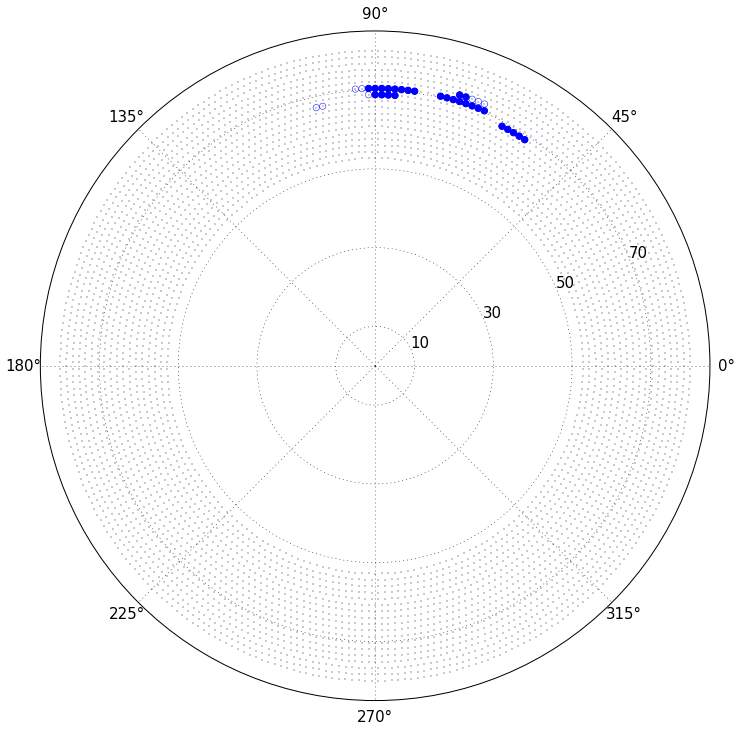

Event 65
0 3 350.09942627 350.18157959 350.141906738
1 15 143.498580933 1512.12695312 691.753255208
2 18 150.732223511 1519.16064453 379.442042033
3 15 156.494049072 157.855545044 157.157219442
4 14 162.195144653 163.56072998 162.868152073
Regestered hits 38
Missed hits 3
All hits 65


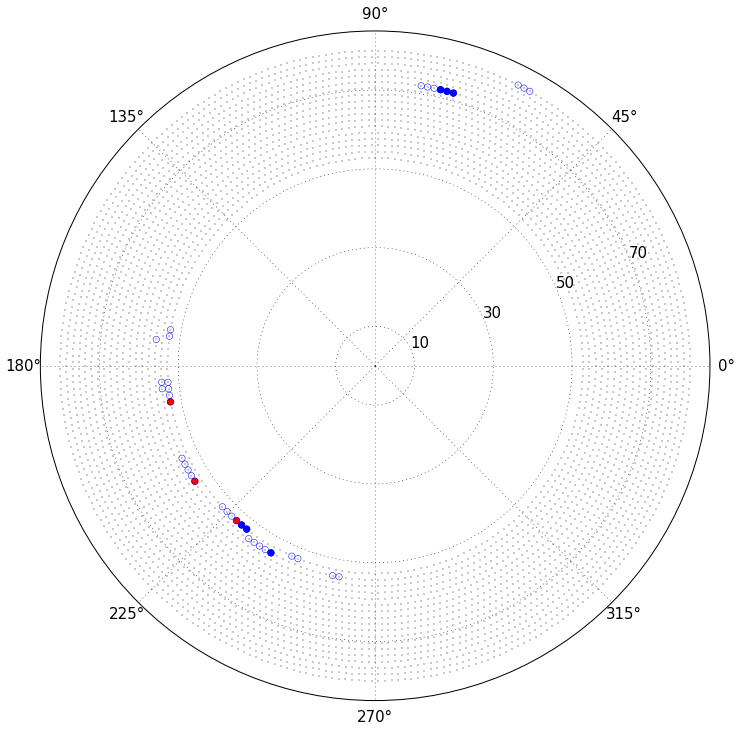

Event 66
1 33 143.663513184 146.503860474 144.983379017
2 15 151.066299438 151.835998535 151.454122925
3 13 156.859710693 157.495513916 157.173905593
4 14 162.539840698 163.239685059 162.885754177
Regestered hits 49
Missed hits 0
All hits 75


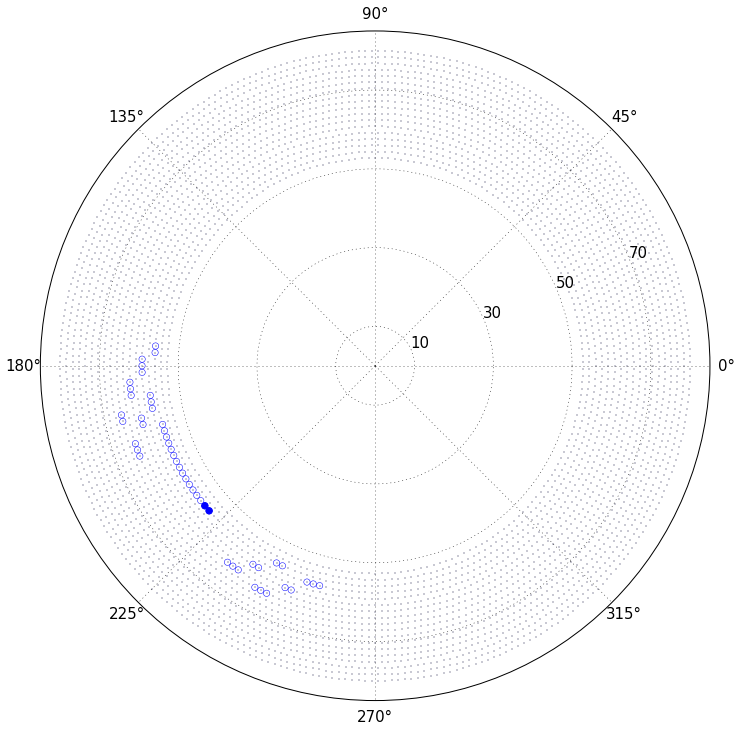

Event 68
1 248 106.177406311 1362.04785156 581.359329747
2 155 113.368080139 1369.15722656 571.359563372
3 73 592.074768066 595.333068848 593.676470195
Regestered hits 350
Missed hits 0
All hits 476


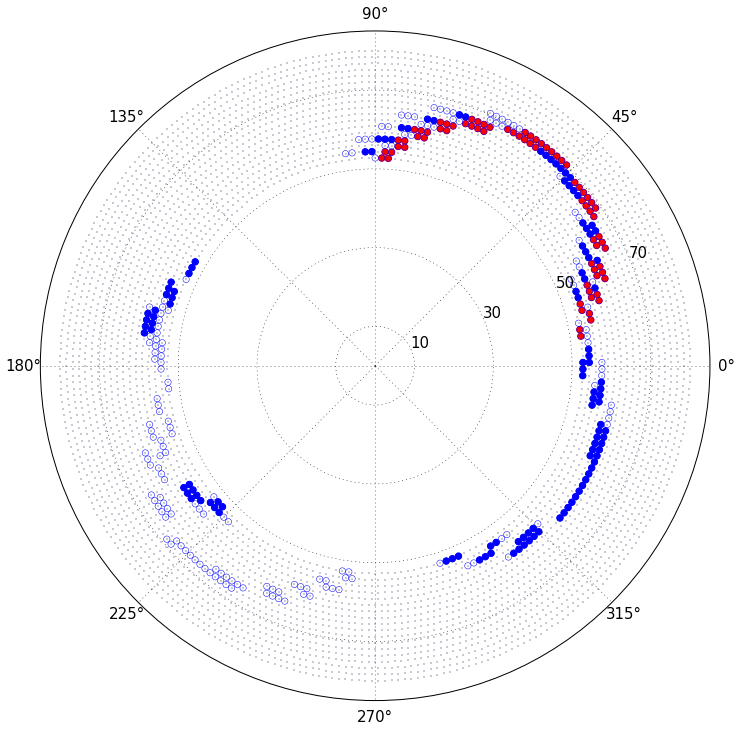

Event 69
1 24 1360.19921875 1361.5090332 1360.81408183
2 25 1367.35205078 1368.63793945 1368.00322754
Regestered hits 29
Missed hits 0
All hits 49


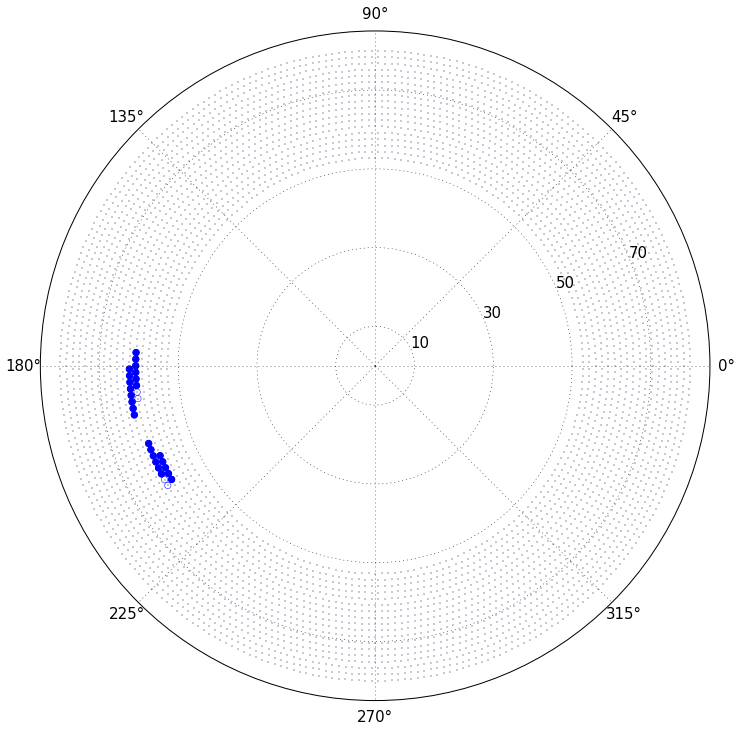

Event 70
0 5 1361.70581055 1364.70678711 1363.14997559
1 77 337.90826416 3099.77246094 2515.73103947
2 2 1368.07995605 1368.11328125 1368.09661865
Regestered hits 81
Missed hits 4
All hits 84


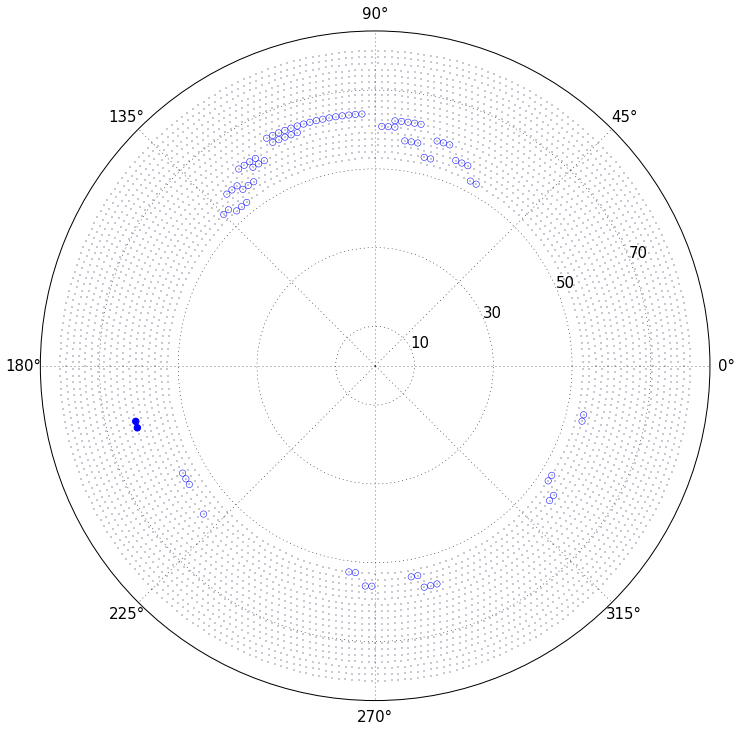

Event 72
1 11 339.603271484 1261.87438965 925.275146484
2 5 1266.18579102 1266.33435059 1266.2543457
Regestered hits 12
Missed hits 0
All hits 16


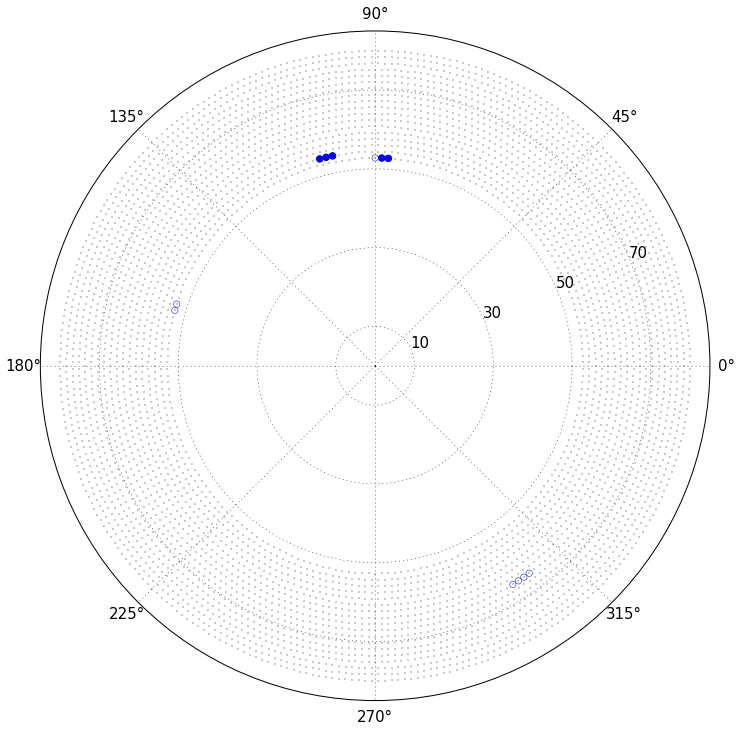

Event 73
1 26 1259.23950195 1261.77185059 1260.6095628
2 14 1266.35449219 1266.89477539 1266.62108503
Regestered hits 31
Missed hits 0
All hits 40


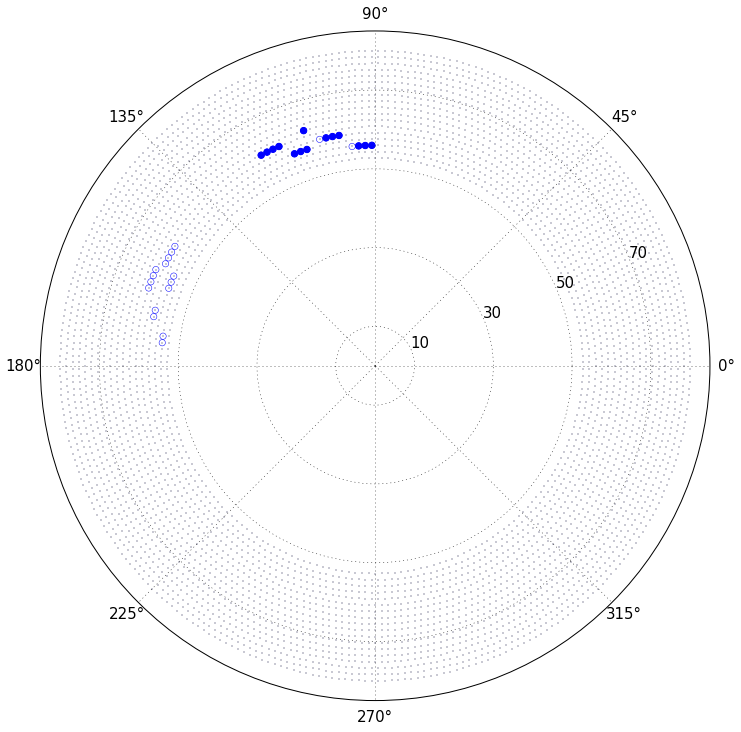

Event 74
1 74 876.610473633 1261.12768555 1022.81989928
2 2 1266.96569824 1266.98657227 1266.97613525
Regestered hits 69
Missed hits 0
All hits 76


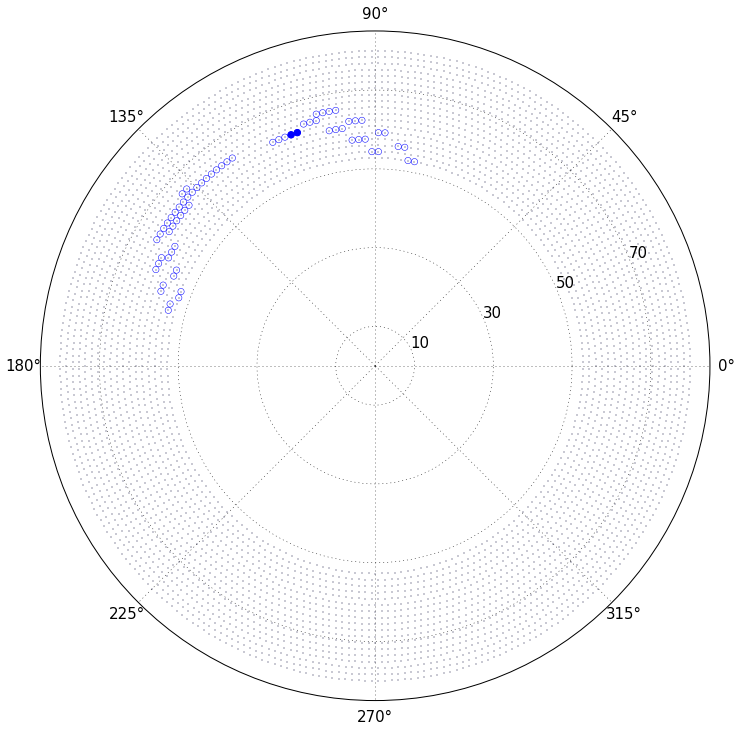

Event 76
0 2 878.138916016 878.351501465 878.24520874
1 132 878.309082031 2865.96435547 1485.00055117
2 7 2870.61083984 2872.84985352 2871.5975865
Regestered hits 135
Missed hits 2
All hits 141


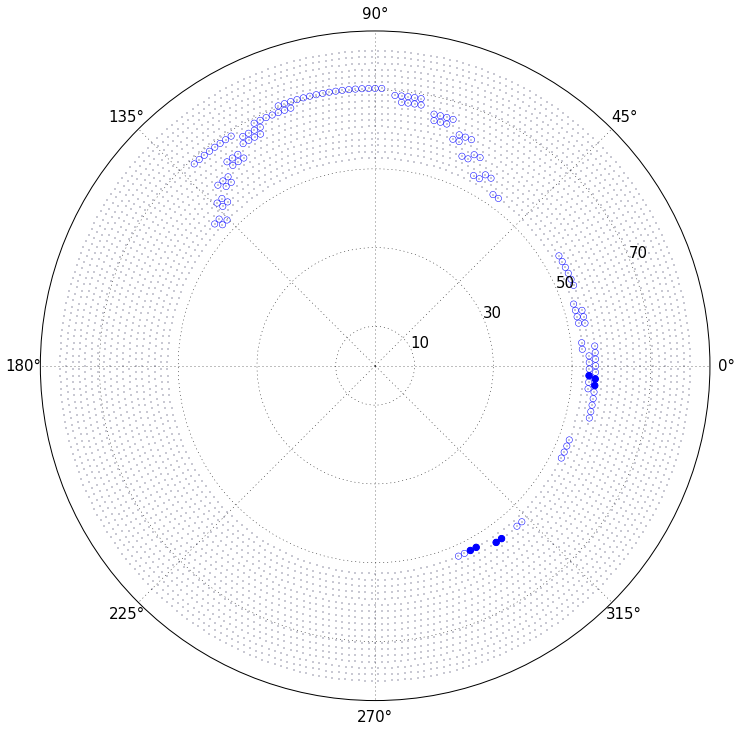

Event 77
1 17 2863.55566406 2865.61938477 2864.46922392
2 22 2870.82470703 2872.70751953 2871.74569425
Regestered hits 33
Missed hits 0
All hits 39


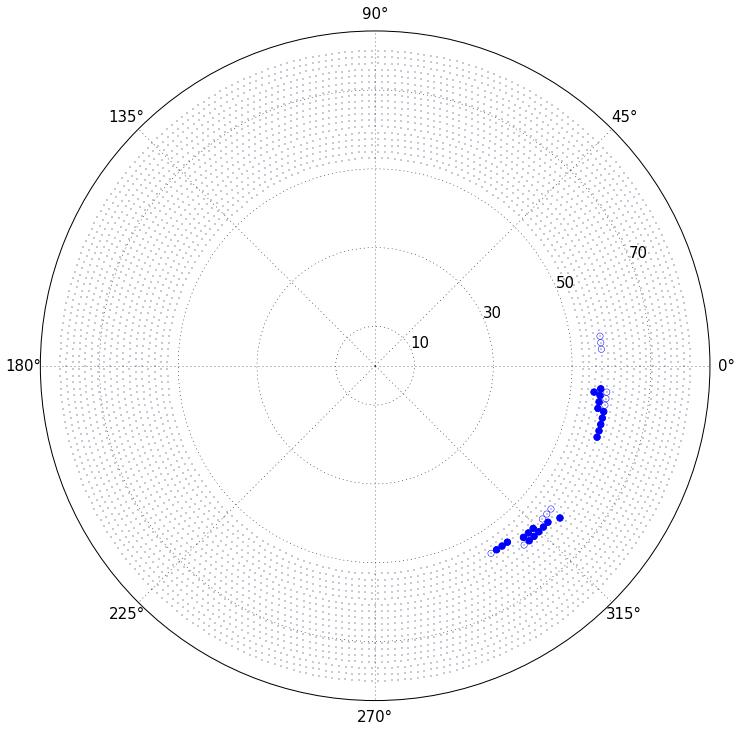

Event 78
1 44 617.00982666 2865.27954102 1843.66462291
2 15 2871.41455078 2872.26293945 2871.85437826
Regestered hits 54
Missed hits 0
All hits 59


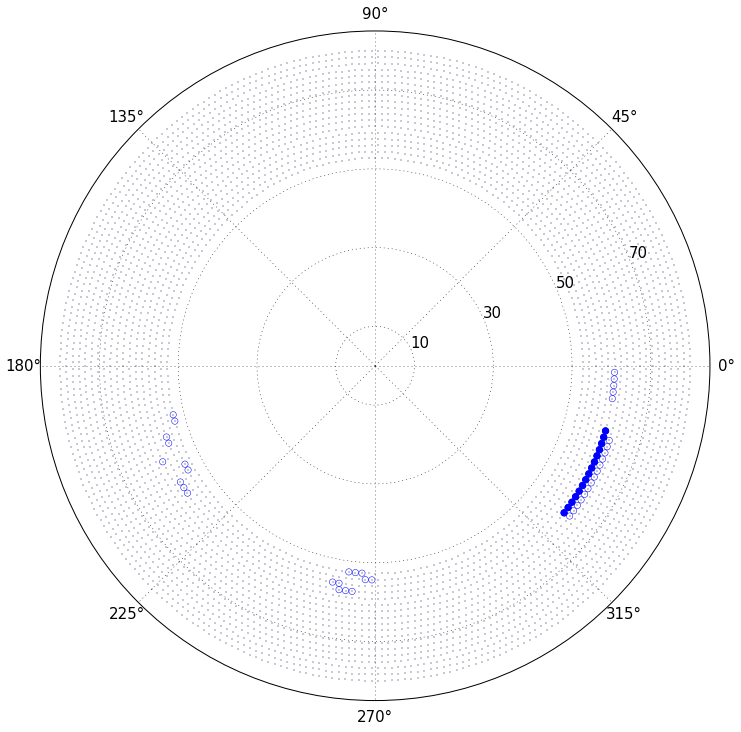

Event 79
0 8 507.707214355 521.562988281 515.070079803
1 244 285.685302734 1994.47729492 602.632275441
2 147 292.868286133 2001.45812988 556.570161781
3 77 519.595703125 2008.40136719 849.010969682
4 16 2012.44482422 2015.24902344 2013.69597626
5 18 2019.31665039 2022.20471191 2020.76795112
Regestered hits 337
Missed hits 8
All hits 510


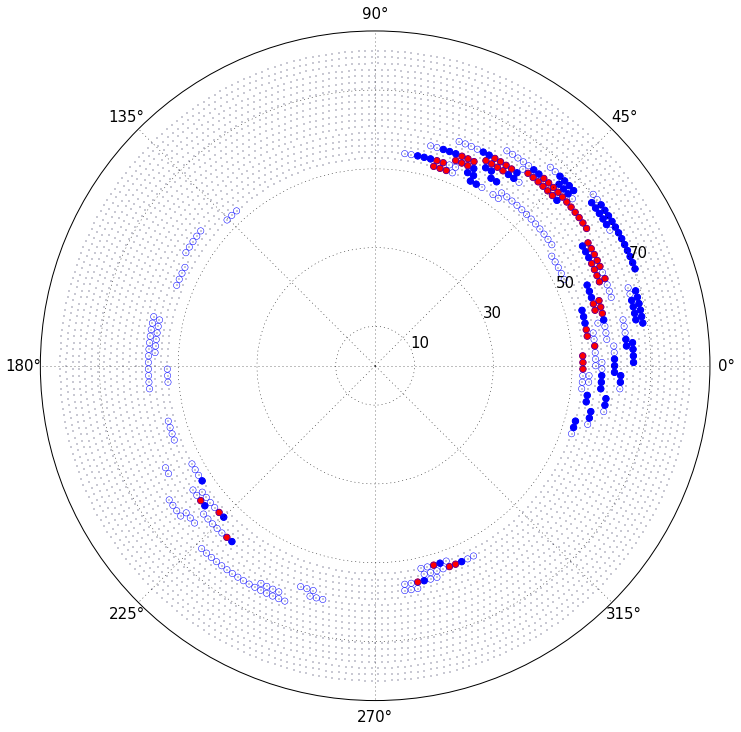

Event 80
1 14 1991.76745605 1994.23754883 1993.28685652
2 16 1998.9777832 2001.17431641 2000.16778564
3 16 2005.91137695 2008.12451172 2007.11958313
4 14 2012.84057617 2014.96801758 2013.99409703
5 13 2019.71240234 2021.81323242 2020.70769794
Regestered hits 40
Missed hits 0
All hits 73


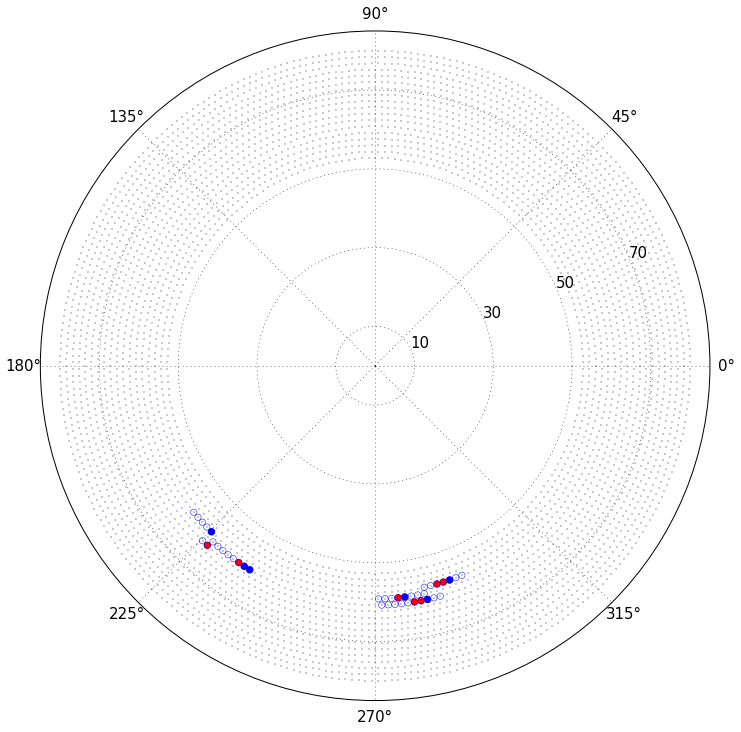

Event 81
0 3 2020.96289062 2022.28540039 2021.61222331
1 38 1992.00292969 1993.87353516 1992.96437474
2 33 1999.24633789 2000.80126953 1999.99922319
3 32 2006.20056152 2007.74951172 2006.99577332
4 32 2013.07128906 2014.57836914 2013.82157516
5 31 2020.00634766 2021.51464844 2020.75361486
Regestered hits 77
Missed hits 3
All hits 169


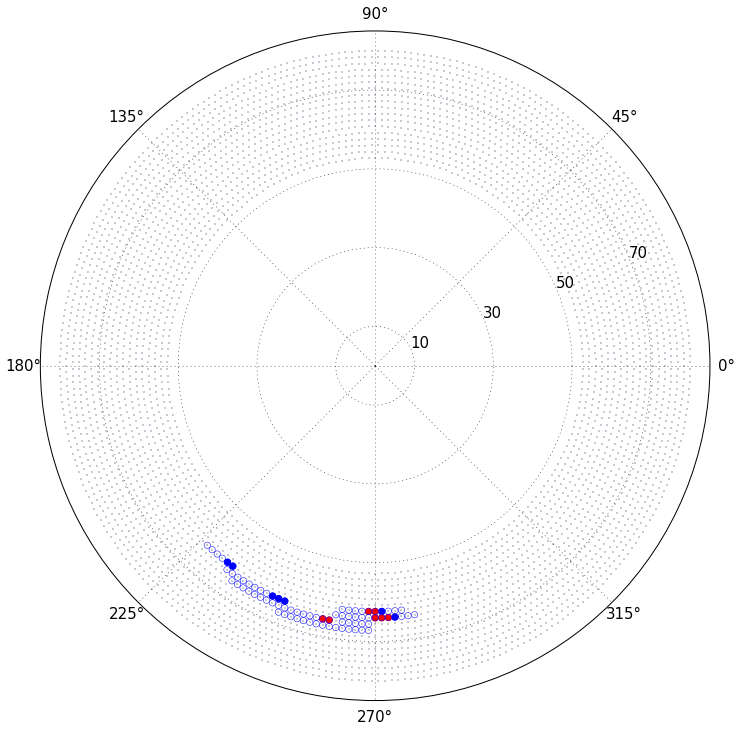

Event 82
1 37 2884.30664062 2887.64331055 2886.00483662
2 38 2891.52392578 2894.9296875 2893.26098633
Regestered hits 62
Missed hits 0
All hits 75


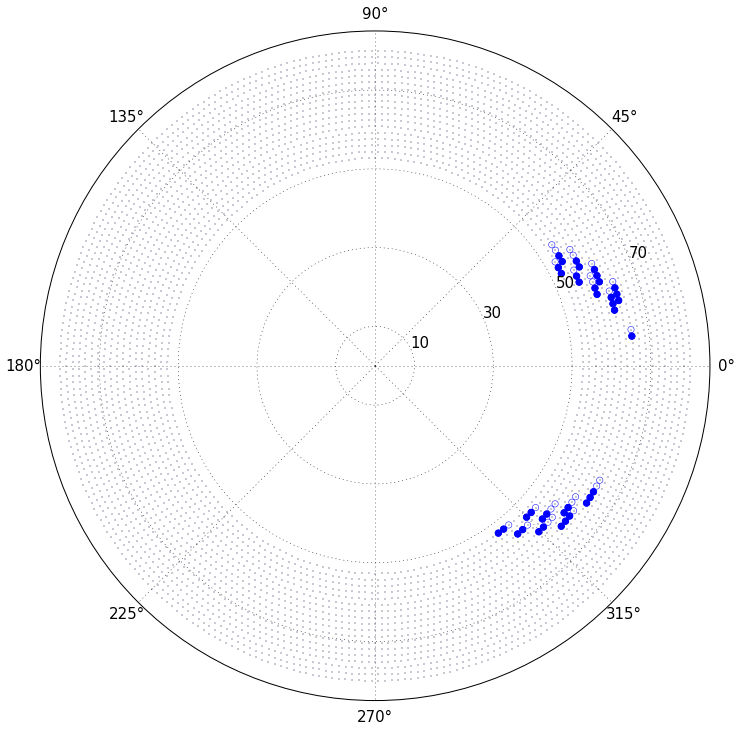

Event 83
1 29 2885.08398438 2886.8828125 2885.91302701
2 29 2892.28491211 2894.12207031 2893.07143218
Regestered hits 41
Missed hits 0
All hits 58


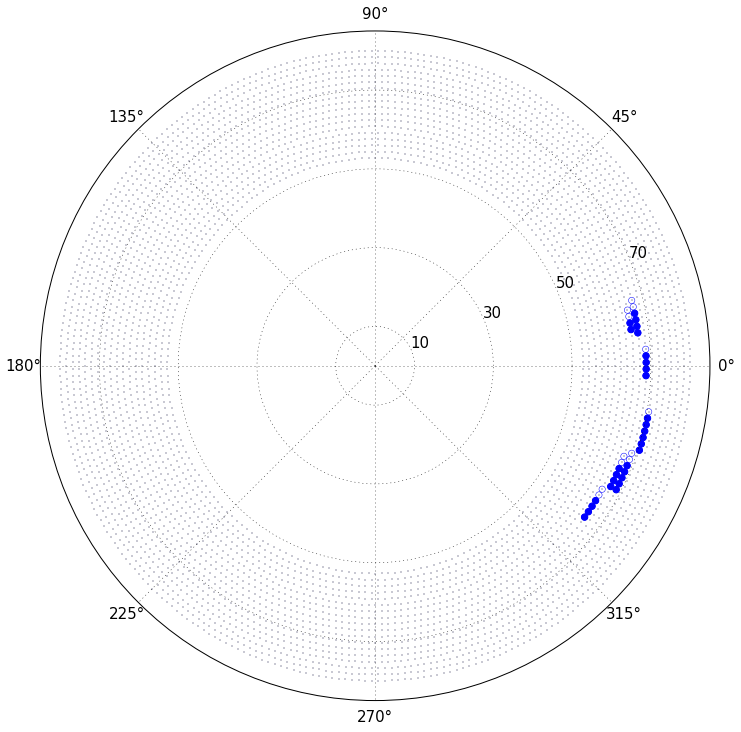

Event 84
1 2 2885.86206055 2885.89453125 2885.8782959
2 3 2893.12255859 2893.22607422 2893.18017578
Regestered hits 3
Missed hits 0
All hits 5


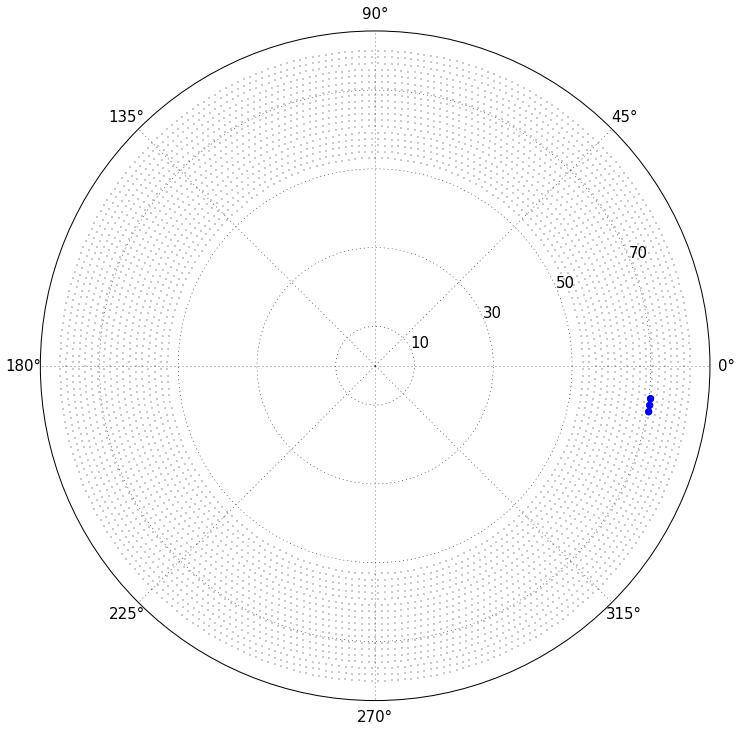

Event 85
0 1 2887.53930664 2887.53930664 2887.53930664
1 14 296.713623047 2886.29882812 1592.4284777
2 15 303.78692627 2893.59033203 1513.01690063
3 8 310.84777832 314.207763672 312.53213501
4 6 317.806335449 321.011962891 319.405710856
Regestered hits 25
Missed hits 1
All hits 44


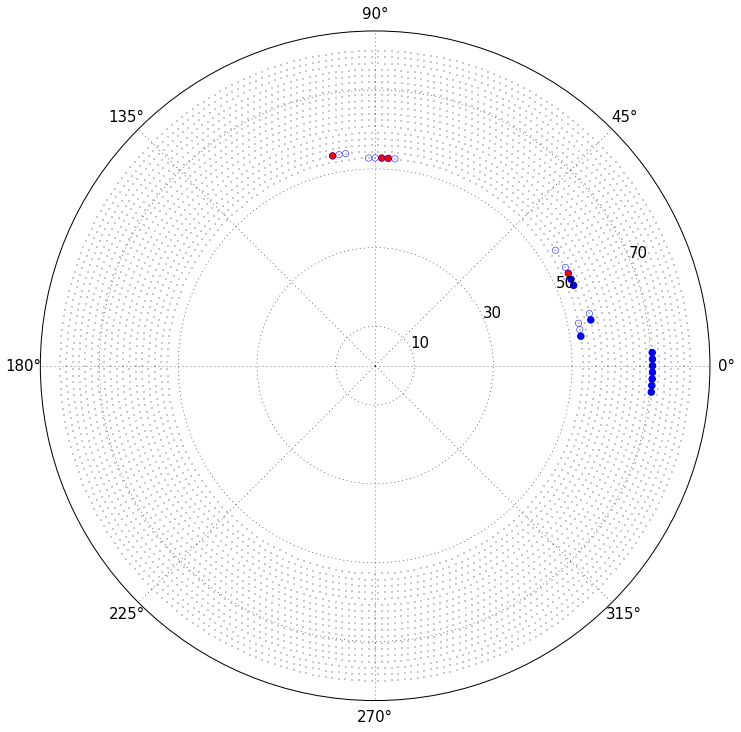

Event 86
1 14 296.855255127 300.095397949 298.477026803
2 15 303.96697998 307.152709961 305.471217855
3 16 310.99432373 314.076660156 312.540185928
4 16 317.957763672 320.856872559 319.410001755
Regestered hits 32
Missed hits 0
All hits 61


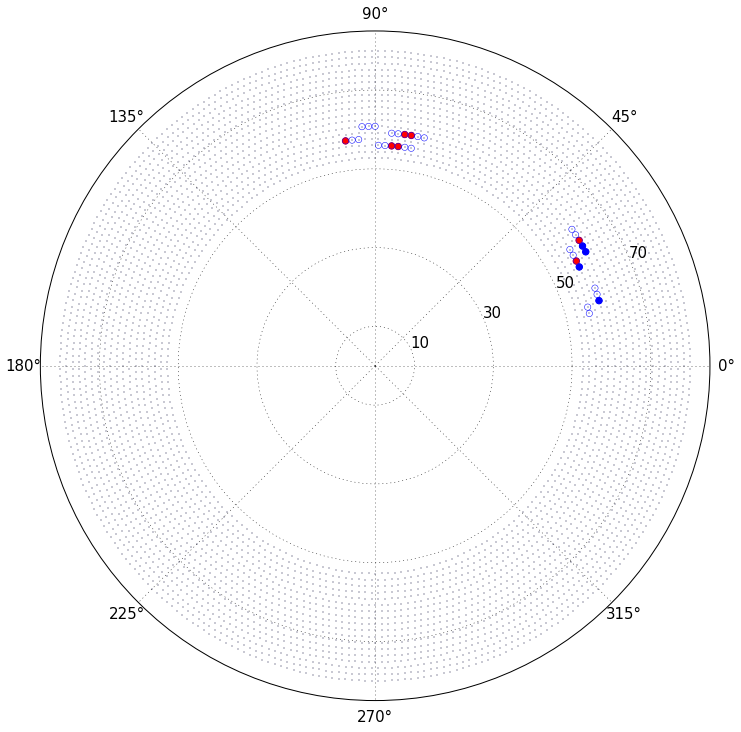

Event 87
1 16 297.141052246 299.876281738 298.362380981
2 17 304.287902832 306.905334473 305.394104004
3 18 311.36517334 313.823547363 312.571065267
4 24 318.311096191 320.530731201 319.355197906
Regestered hits 48
Missed hits 0
All hits 75


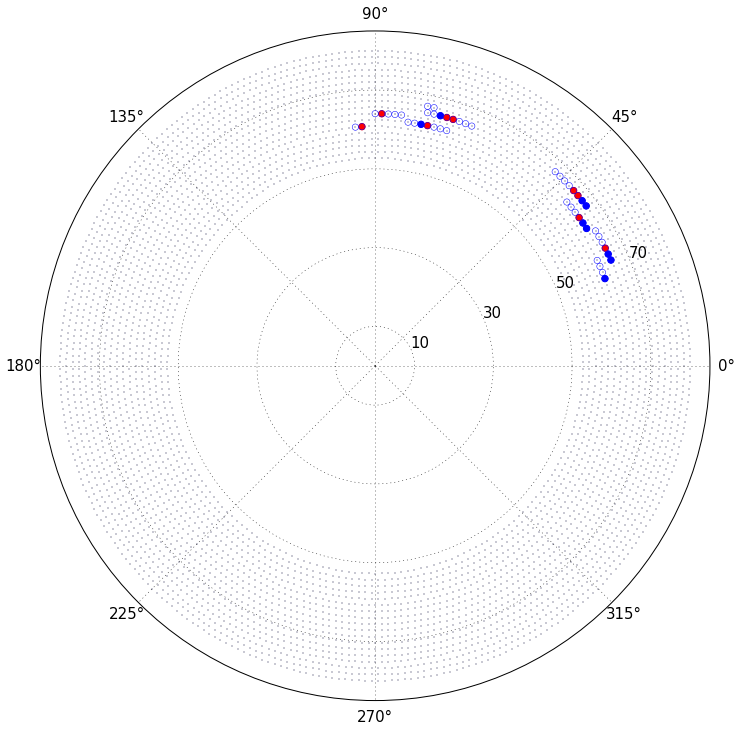

Event 88
1 7 297.546813965 299.499084473 298.628561837
2 8 304.670349121 306.547271729 305.792049408
3 9 311.78036499 313.404968262 312.797417535
4 10 318.817749023 320.144348145 319.538995361
Regestered hits 22
Missed hits 0
All hits 34


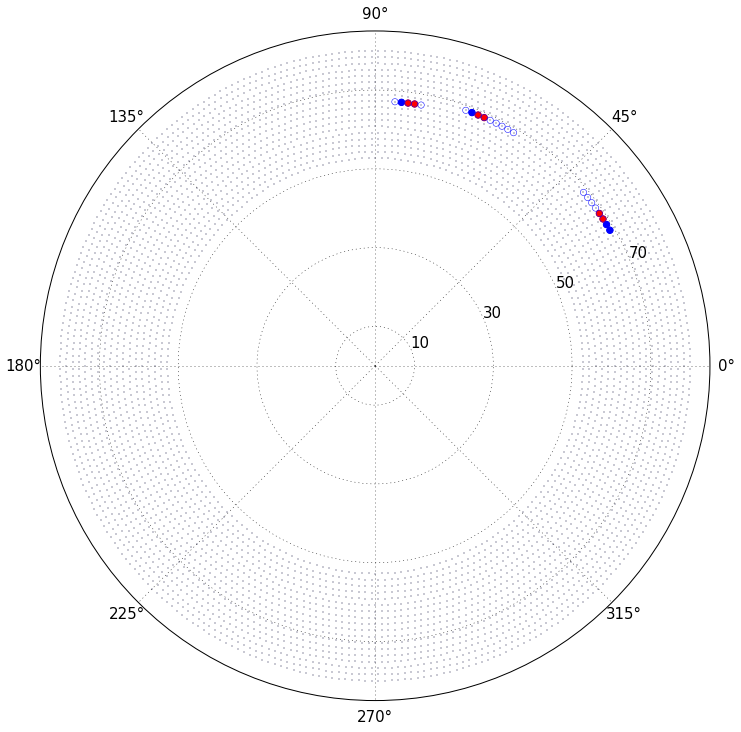

Event 89
1 26 297.71081543 299.342712402 298.434754592
2 27 304.810791016 306.43661499 305.574140761
3 22 311.942932129 313.085510254 312.519515991
4 15 319.031005859 319.7996521 319.403135173
Regestered hits 63
Missed hits 0
All hits 90


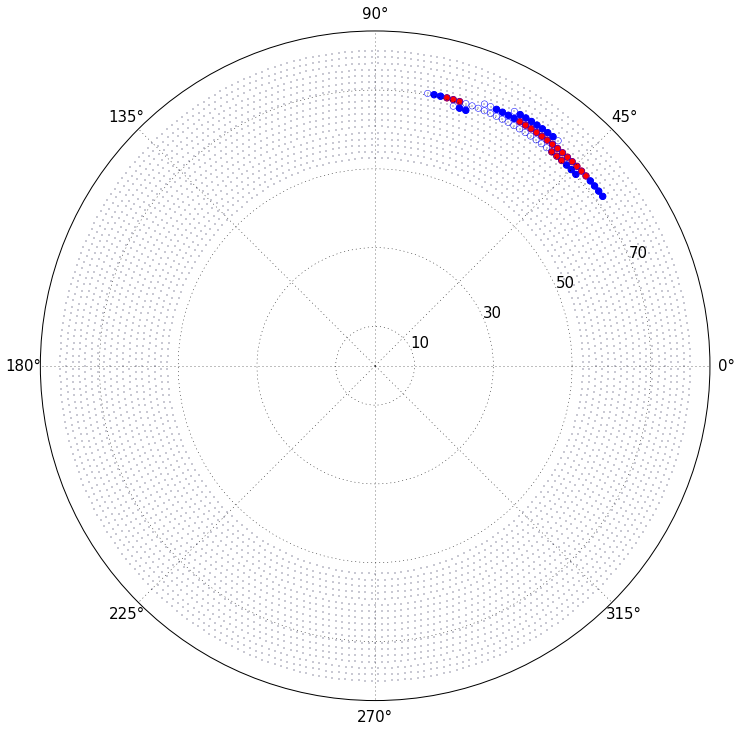

Event 90
1 65 298.51373291 1247.02758789 1128.7672429
2 6 305.585083008 305.855285645 305.725321452
Regestered hits 66
Missed hits 0
All hits 71


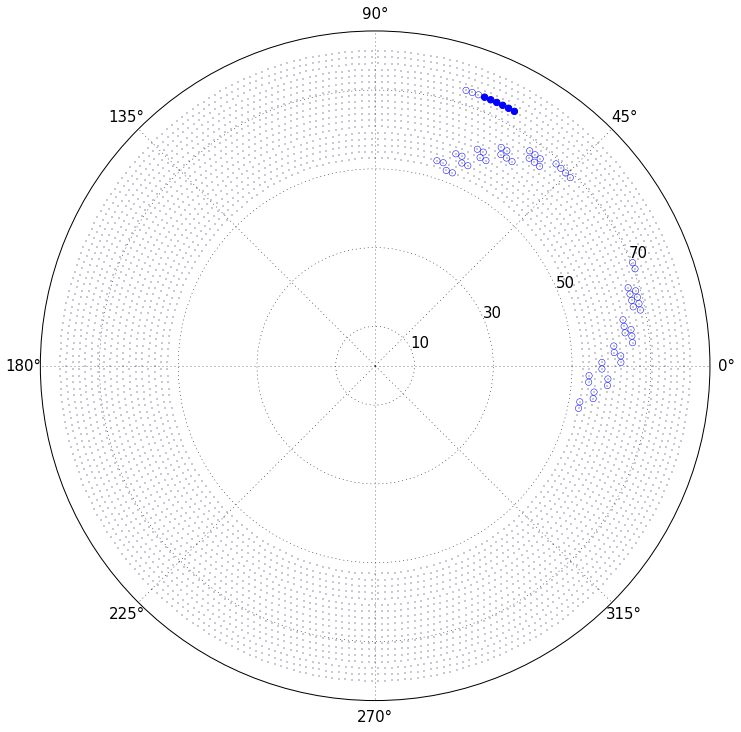

Event 95
1 44 521.967773438 1718.32617188 631.384998668
2 7 1722.38269043 1725.54858398 1723.32521275
Regestered hits 47
Missed hits 0
All hits 51


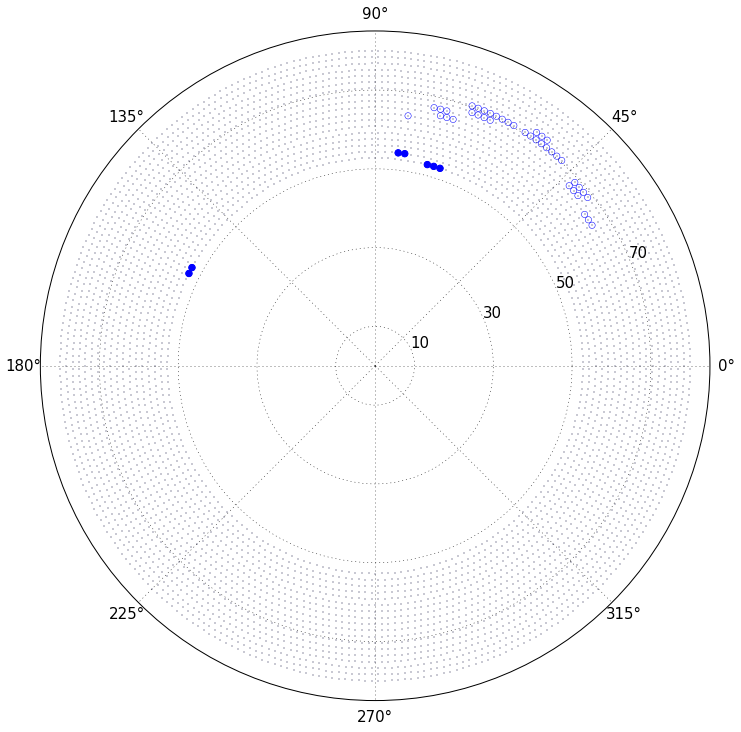

Event 96
1 135 1029.79907227 1718.26269531 1371.7629277
2 79 1125.71557617 1725.43408203 1610.7456441
3 15 1132.83288574 1135.78100586 1134.5514974
4 16 1139.90820312 1142.82666016 1141.67375183
5 17 1146.95678711 1149.80541992 1148.59046128
6 16 1153.91967773 1156.7935791 1155.65265656
Regestered hits 182
Missed hits 0
All hits 278


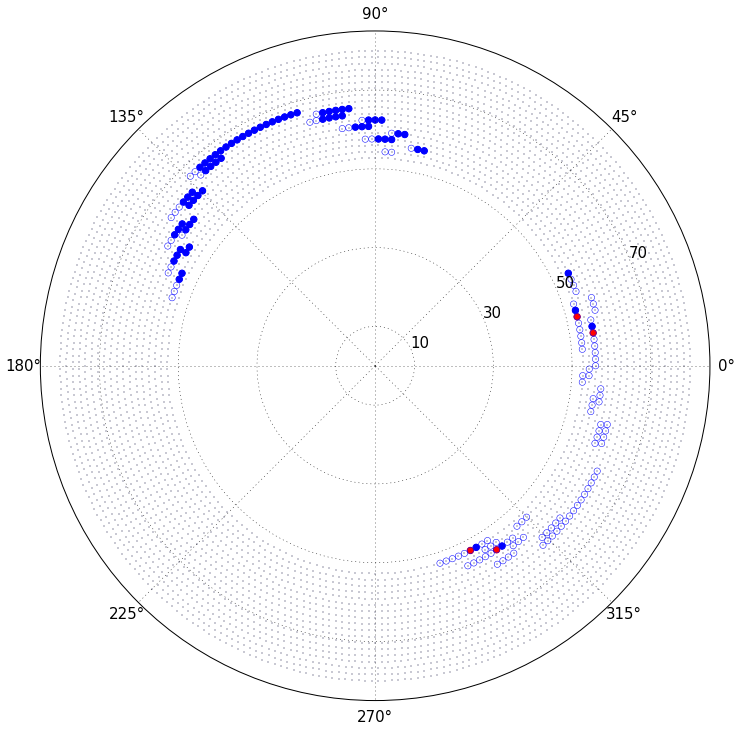

Event 97
1 5 1118.89331055 1121.19372559 1119.79821777
2 5 1126.01147461 1128.36279297 1126.93327637
3 6 1133.12524414 1135.49523926 1134.26515706
4 6 1140.20361328 1142.41723633 1141.30930583
5 6 1147.25805664 1149.35107422 1148.30867513
6 6 1154.21069336 1156.38574219 1155.29766846
Regestered hits 11
Missed hits 0
All hits 34


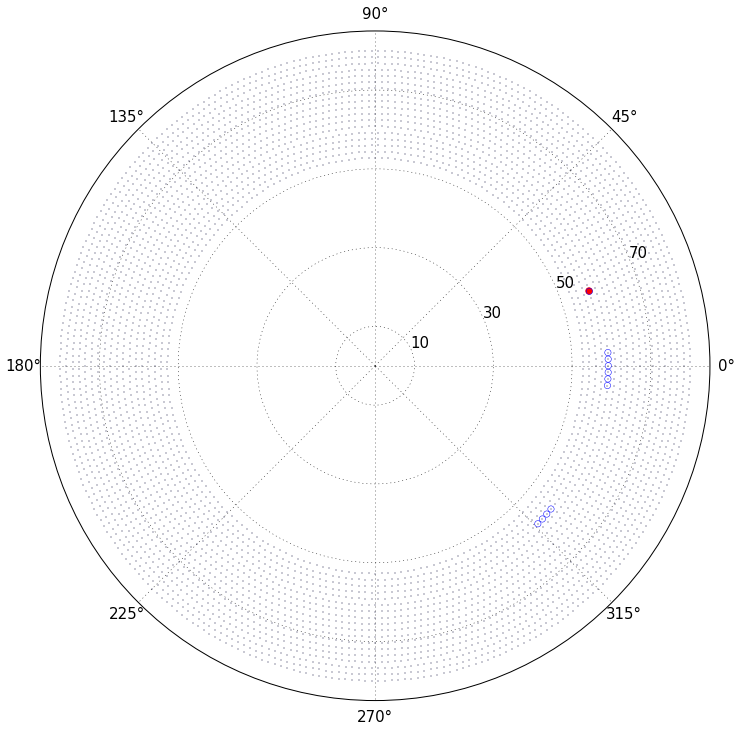

Event 98
1 15 1119.01220703 1121.09350586 1120.06892904
2 17 1126.12548828 1128.26611328 1127.12599092
3 15 1133.23706055 1135.37695312 1134.13254395
4 12 1140.3527832 1142.2734375 1140.93414307
5 14 1147.37561035 1149.25756836 1148.02887835
6 13 1154.32531738 1156.24145508 1154.91560246
Regestered hits 30
Missed hits 0
All hits 86


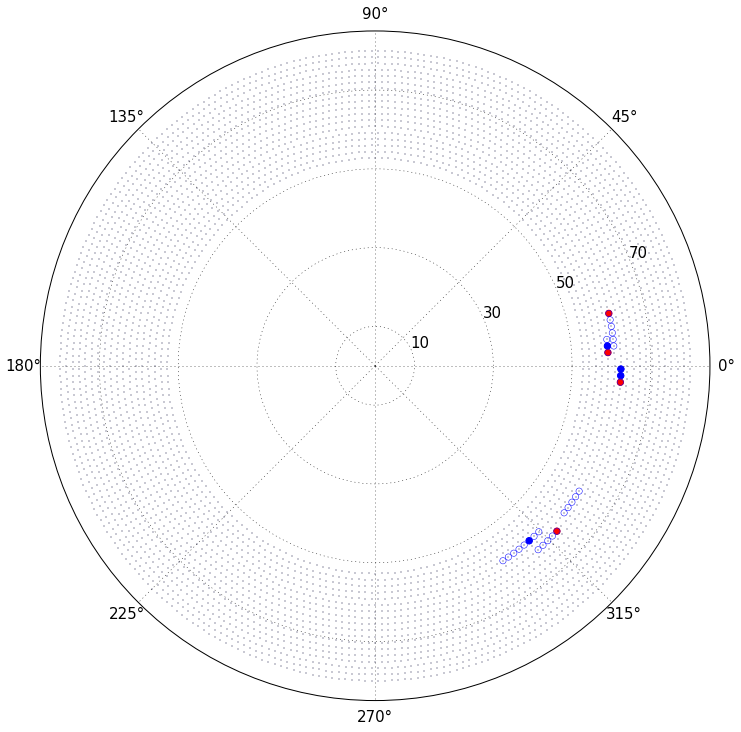

Event 99
1 8 1119.2980957 1120.64990234 1119.58964539
2 8 1126.49658203 1127.84765625 1126.92718506
3 9 1133.64208984 1135.03833008 1134.16396756
4 10 1140.72766113 1142.15246582 1141.33370361
5 9 1147.80249023 1149.10205078 1148.40016005
6 9 1154.77612305 1156.12036133 1155.39204915
Regestered hits 17
Missed hits 0
All hits 53


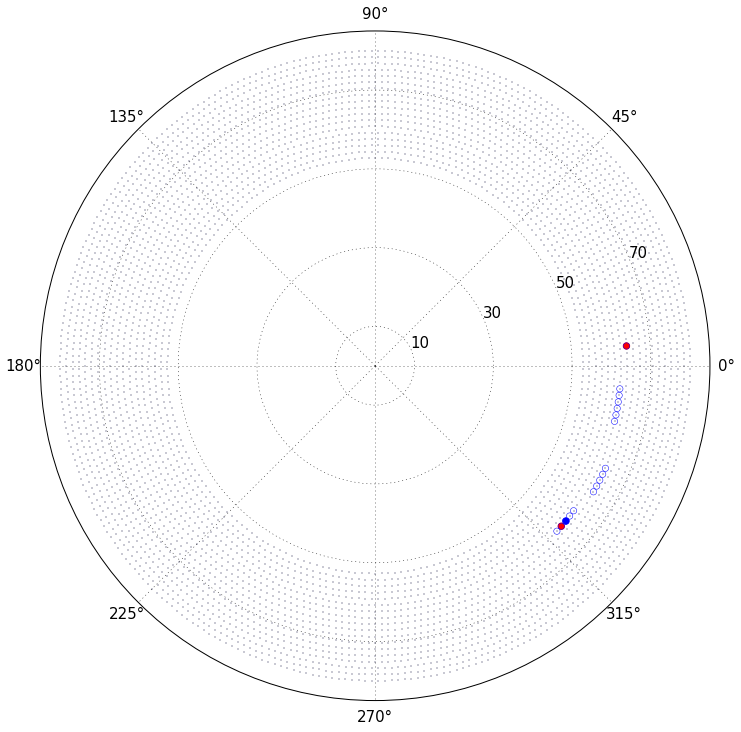

In [46]:
for event in range(100):
    if (2 in all_times[event].keys()):
        plot_output(all_event[event] - 2, geom)
        plot_add_outlines(all_event[event] != 0, geom)
        print "Event {}".format(index_to_event[event])
        this_sum = 0
        for turn in all_times[event].keys():
            n_hits = len(all_times[event][turn])
            print turn, n_hits, \
                        np.amin(all_times[event][turn]), \
                        np.amax(all_times[event][turn]), \
                        np.average(all_times[event][turn])
            this_sum += n_hits
        print "Regestered hits {}".format(sum(all_event[event] != 0))
        print "Missed hits {}".format(sum(all_event[event] == 1))
        print "All hits {}".format(this_sum)
        show()